In [1]:
import pandas as pd
import numpy as np

from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

from src.datasets import daocensus_text
import src.utils.notebooks as nbutils

sns.set_theme()
plt.rcParams['figure.dpi'] = 600

In [2]:
# 'ORG_NAME', 'ORG_PLATFORM', 'SPLITS_FREQ', 'SPLITS_NORMALIZE', 'LAST_SPLITS', 'USE_ORG_NAMES'

ORG_NAME = 'Aave - Aavegotchi'
ORG_PLATFORM = 'snapshot'
USE_ORG_NAMES = True

# Not used
SPLITS_FREQ = ...
SPLITS_NORMALIZE = ...
LAST_SPLITS = ...

In [3]:
# Parameters
ORG_NAME = "dxDAO - xDXdao"
ORG_PLATFORM = "daostack"
SPLITS_FREQ = "W-THU"
SPLITS_NORMALIZE = True
LAST_SPLITS = 10
USE_ORG_NAMES = True
EXECUTION_ID = "2024-03-01 12s:00"


In [4]:
dfv, dfp = daocensus_text.get('./data/daos-census-text', ORG_NAME, ORG_PLATFORM, use_org_names=USE_ORG_NAMES)
dfp = dfp.set_index('id')
print(dfv.info())
print(dfp.info())

Warning, removing 8479 votes without proposal
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8479 entries, 0 to 8478
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   platform       8479 non-null   object        
 1   name           8479 non-null   object        
 2   id             8479 non-null   object        
 3   proposal       8479 non-null   category      
 4   deployment     8479 non-null   object        
 5   platform_vote  8479 non-null   object        
 6   voter          8479 non-null   category      
 7   date           8479 non-null   datetime64[ns]
 8   choice         8479 non-null   object        
 9   weight         8479 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(1), object(6)
memory usage: 648.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 2226 entries, 4664058c-09d3-57de-8db7-24590e824bd8 to 65f86903-3e4d-5893-a554-c174e90809

# Exploración de datos de Decentraland

In [5]:
print(f"{ORG_NAME} tiene {len(dfv)} votos de {dfv['voter'].nunique()} voters en {dfv['proposal'].nunique()} propuestas")

dxDAO - xDXdao tiene 8479 votos de 193 voters en 2226 propuestas


In [6]:
dfd = dfp[['platform', 'name', 'platform_deployment']].drop_duplicates()
dfd

platform            name  \
id                                                               
4664058c-09d3-57de-8db7-24590e824bd8  daostack  dxDAO - xDXdao   
1781c881-b719-5042-8ecf-661a360fffe1  daostack  dxDAO - xDXdao   

                                                             platform_deployment  
id                                                                                
4664058c-09d3-57de-8db7-24590e824bd8  0x519b70055af55a007110b4ff99b0ea33071c720a  
1781c881-b719-5042-8ecf-661a360fffe1  0xe716ec63c5673b3a4732d22909b38d779fa47c3f

## Histograma de votos por usuario

193
23
count    193.000000
mean      43.932642
std      104.867926
min        1.000000
50%        7.000000
90%      133.400000
95%      216.800000
99%      557.920000
max      813.000000
dtype: float64


Cannot show ipywidgets in text

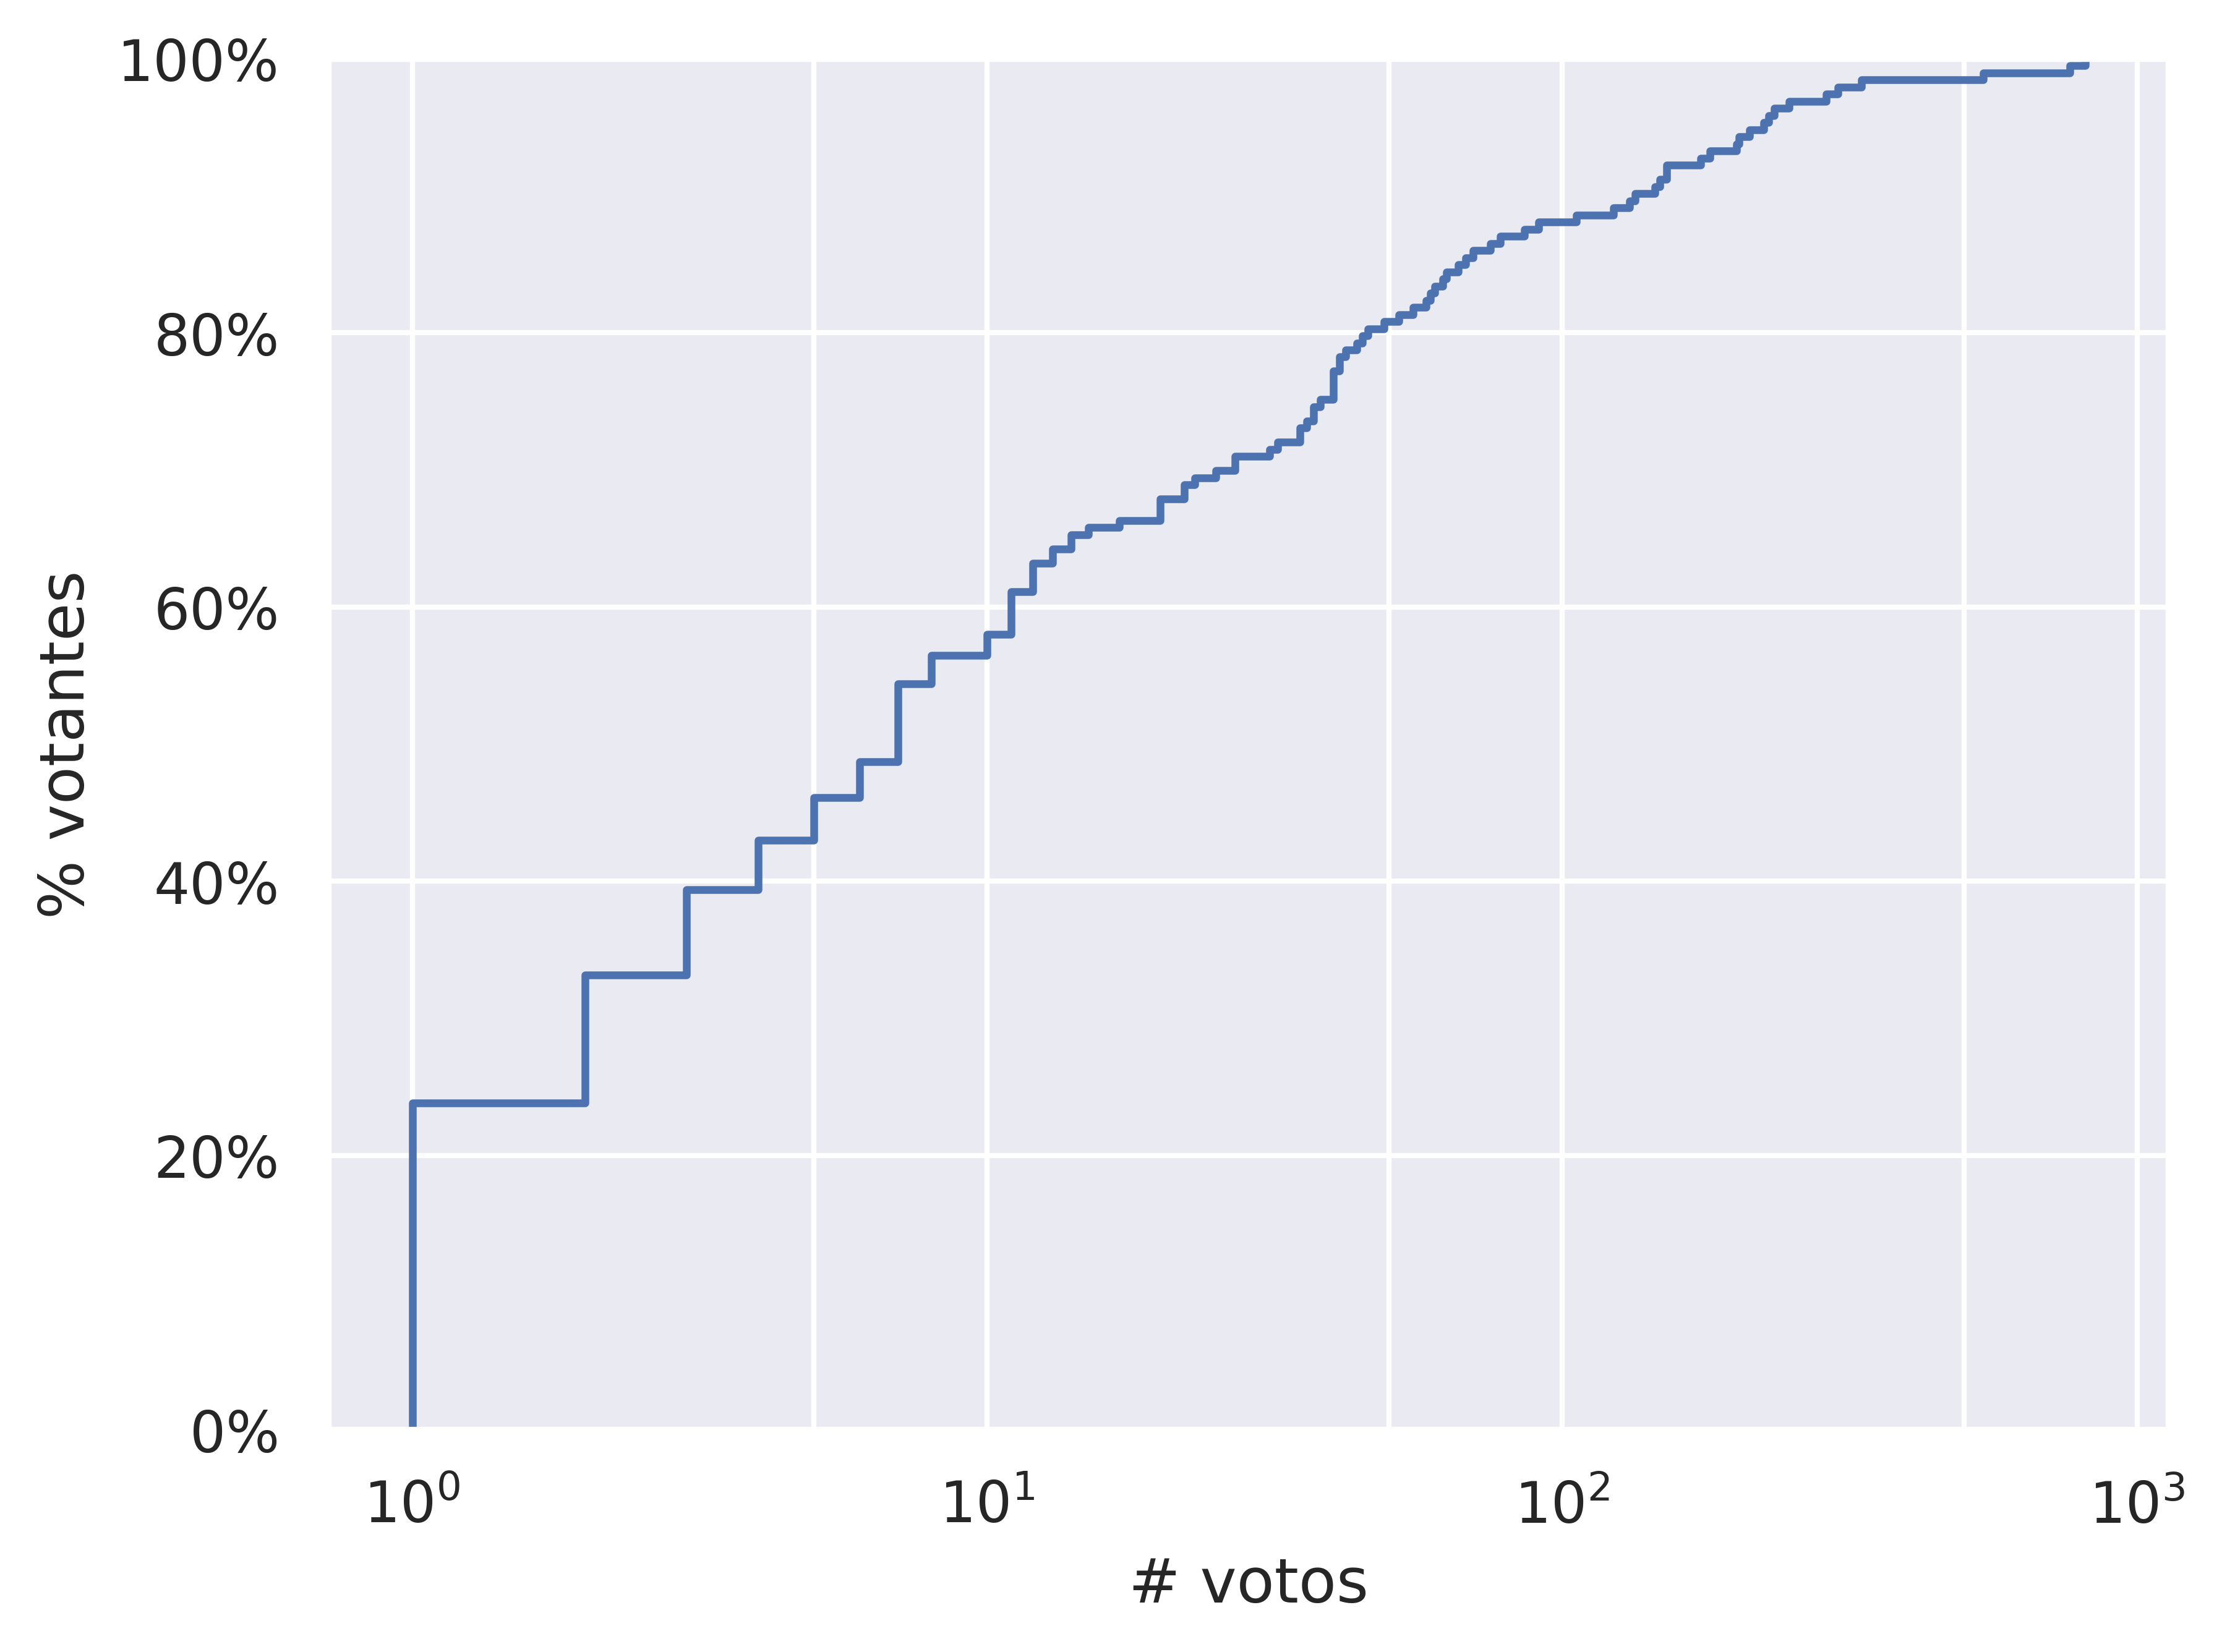

In [7]:
_toplot = dfv.groupby('voter').size()
# _toplot = _toplot[_toplot < 40]
print( len(_toplot) )
print( (_toplot > 100).sum() )
print(_toplot.describe(percentiles=[.5, .9, .95, .99]))
# _toplot.plot.hist(log=True)
ax = sns.ecdfplot(_toplot, log_scale=True)
plt.xlabel('# votos')
plt.ylabel('% votantes')

ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
# ax.xaxis.set_major_locator(mtick.MultipleLocator(10))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_voters_{ORG_NAME}.pdf')

## Histograma de votos por propuesta

count    2226.000000
mean        3.809075
std         3.704589
min         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        23.000000
max        37.000000
Name: votes_count, dtype: float64
0


Cannot show ipywidgets in text

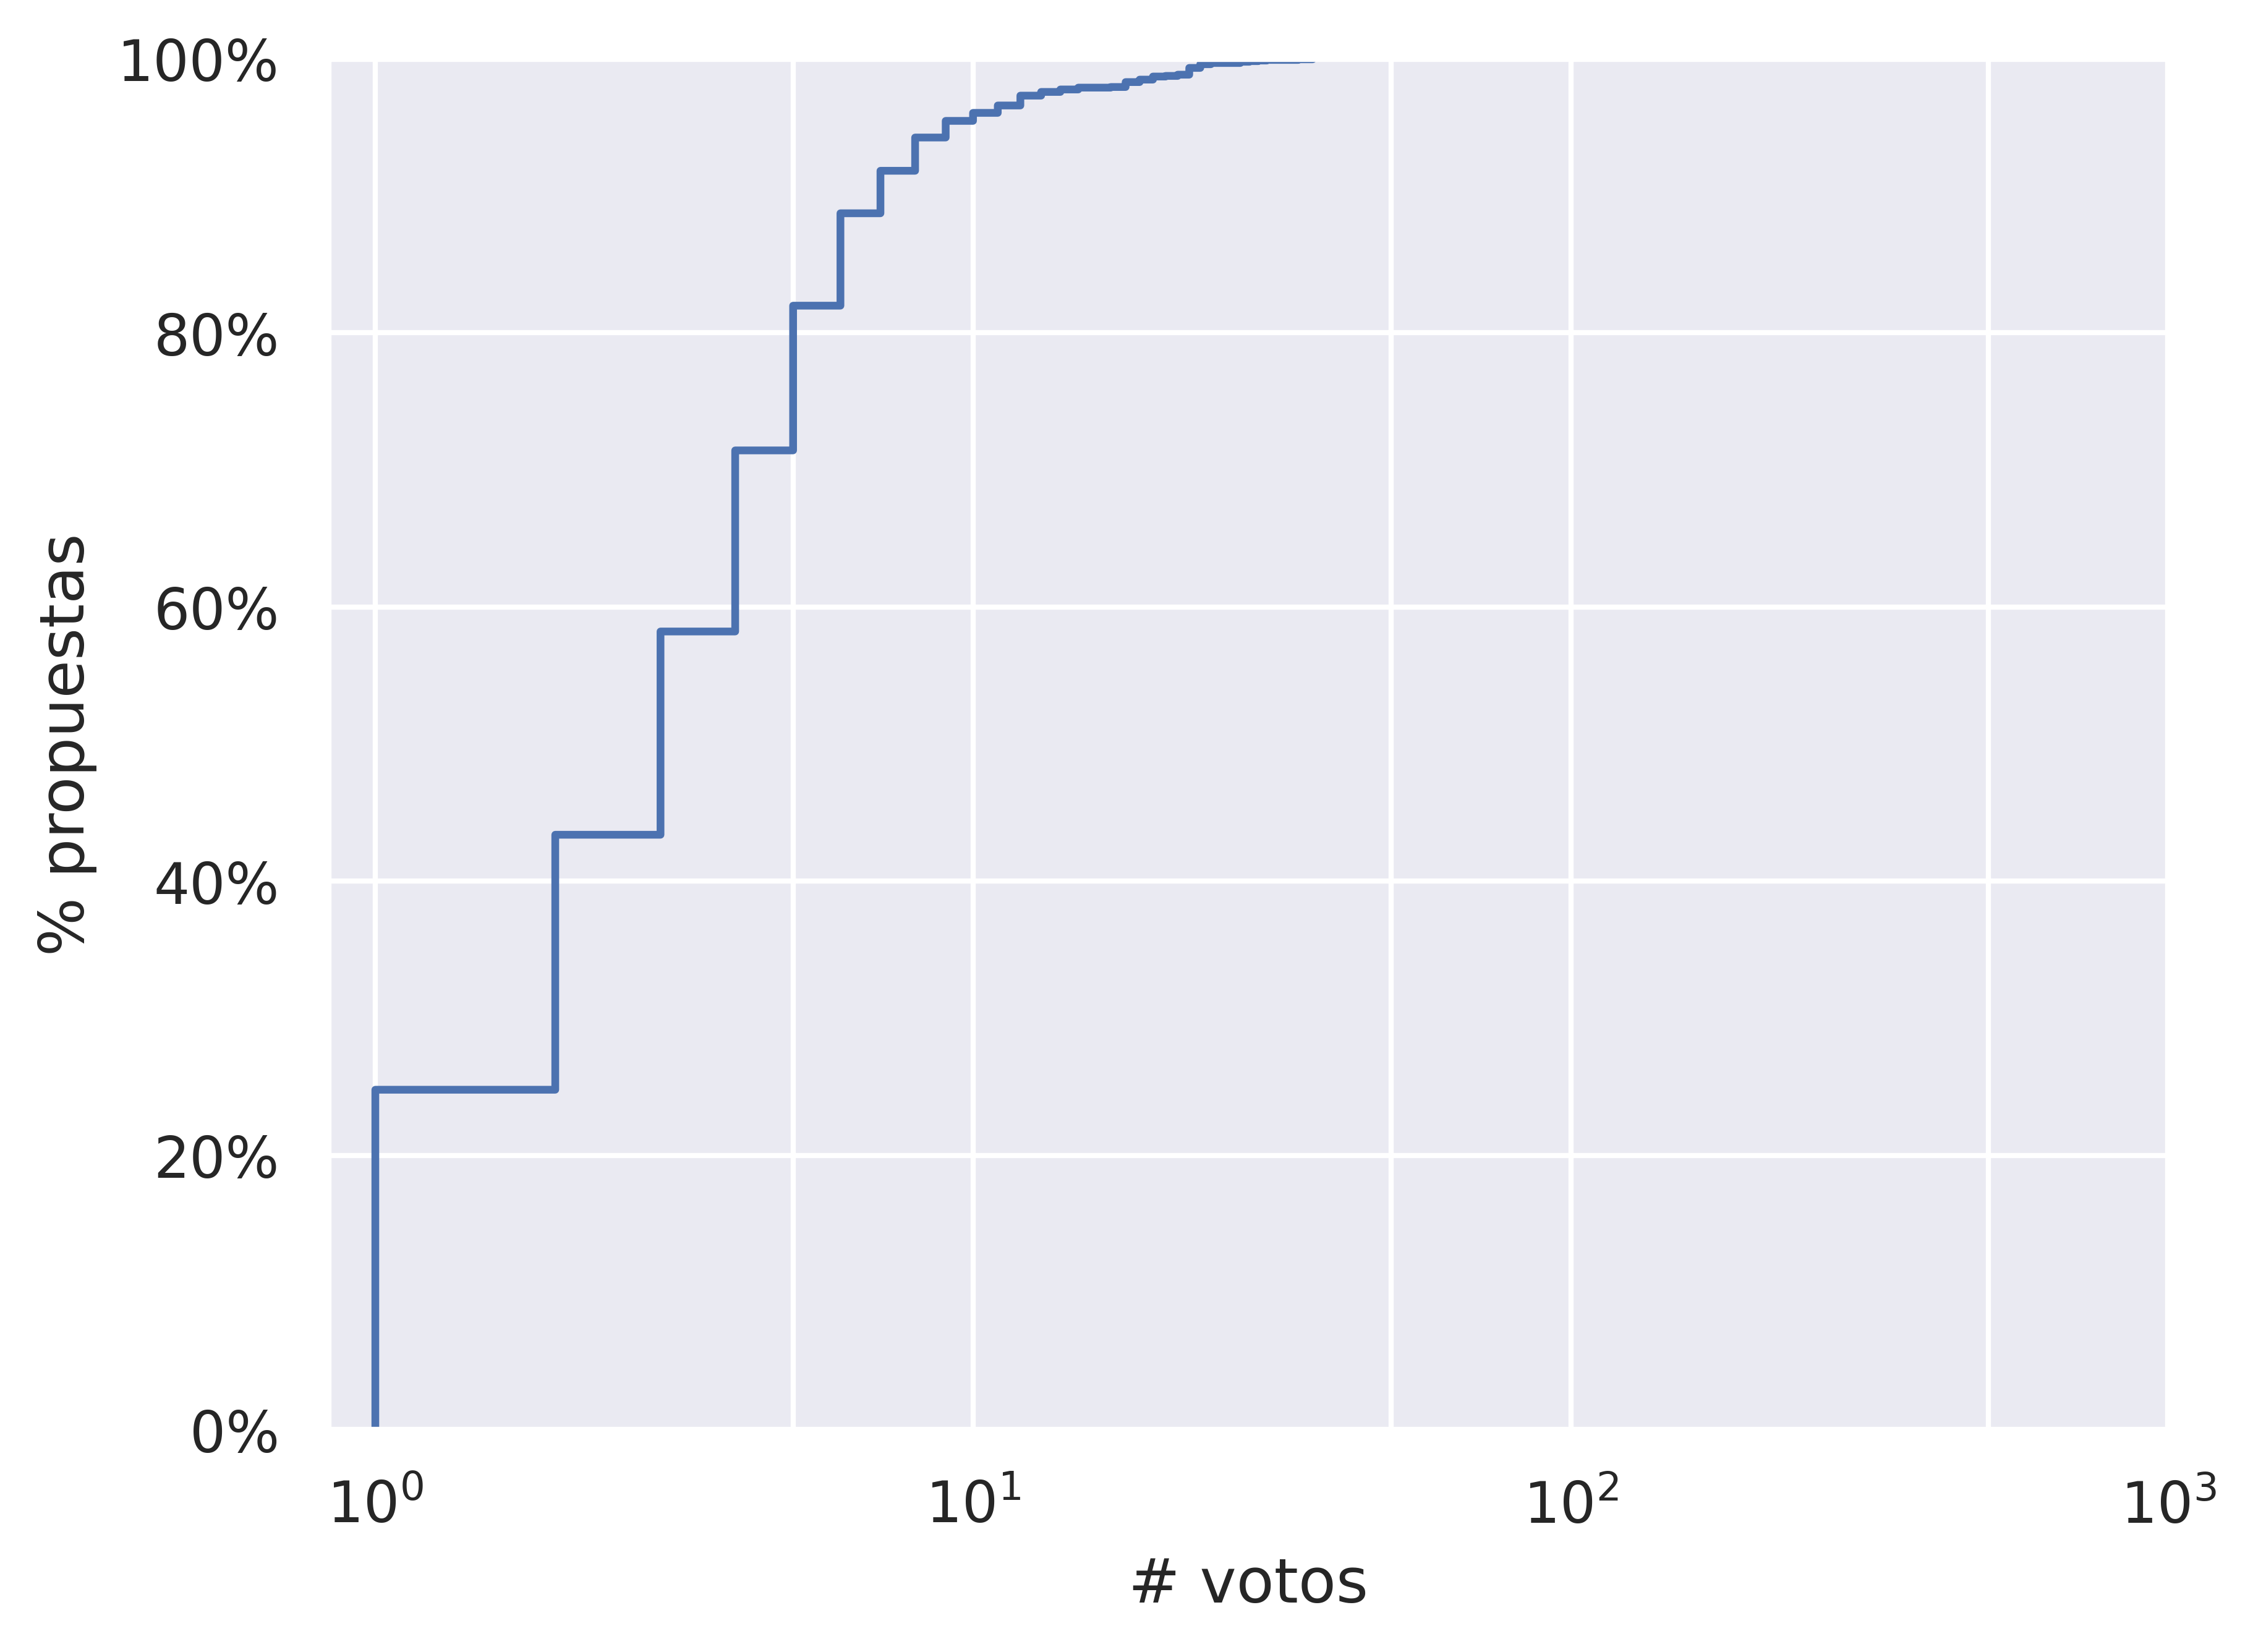

In [8]:
_toplot = dfp['votes_count']
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )

ax = sns.ecdfplot(_toplot, log_scale=True)
ax.set_xticks([1, 5, 10, 50, 100, 500, 1000])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xlabel('# votos')
plt.ylabel('% propuestas')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_ecdf_proposals_{ORG_NAME}.pdf')

count    2226.000000
mean        3.809075
std         3.704589
min         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        23.000000
max        37.000000
dtype: float64
0


<Axes: ylabel='Proportion'>

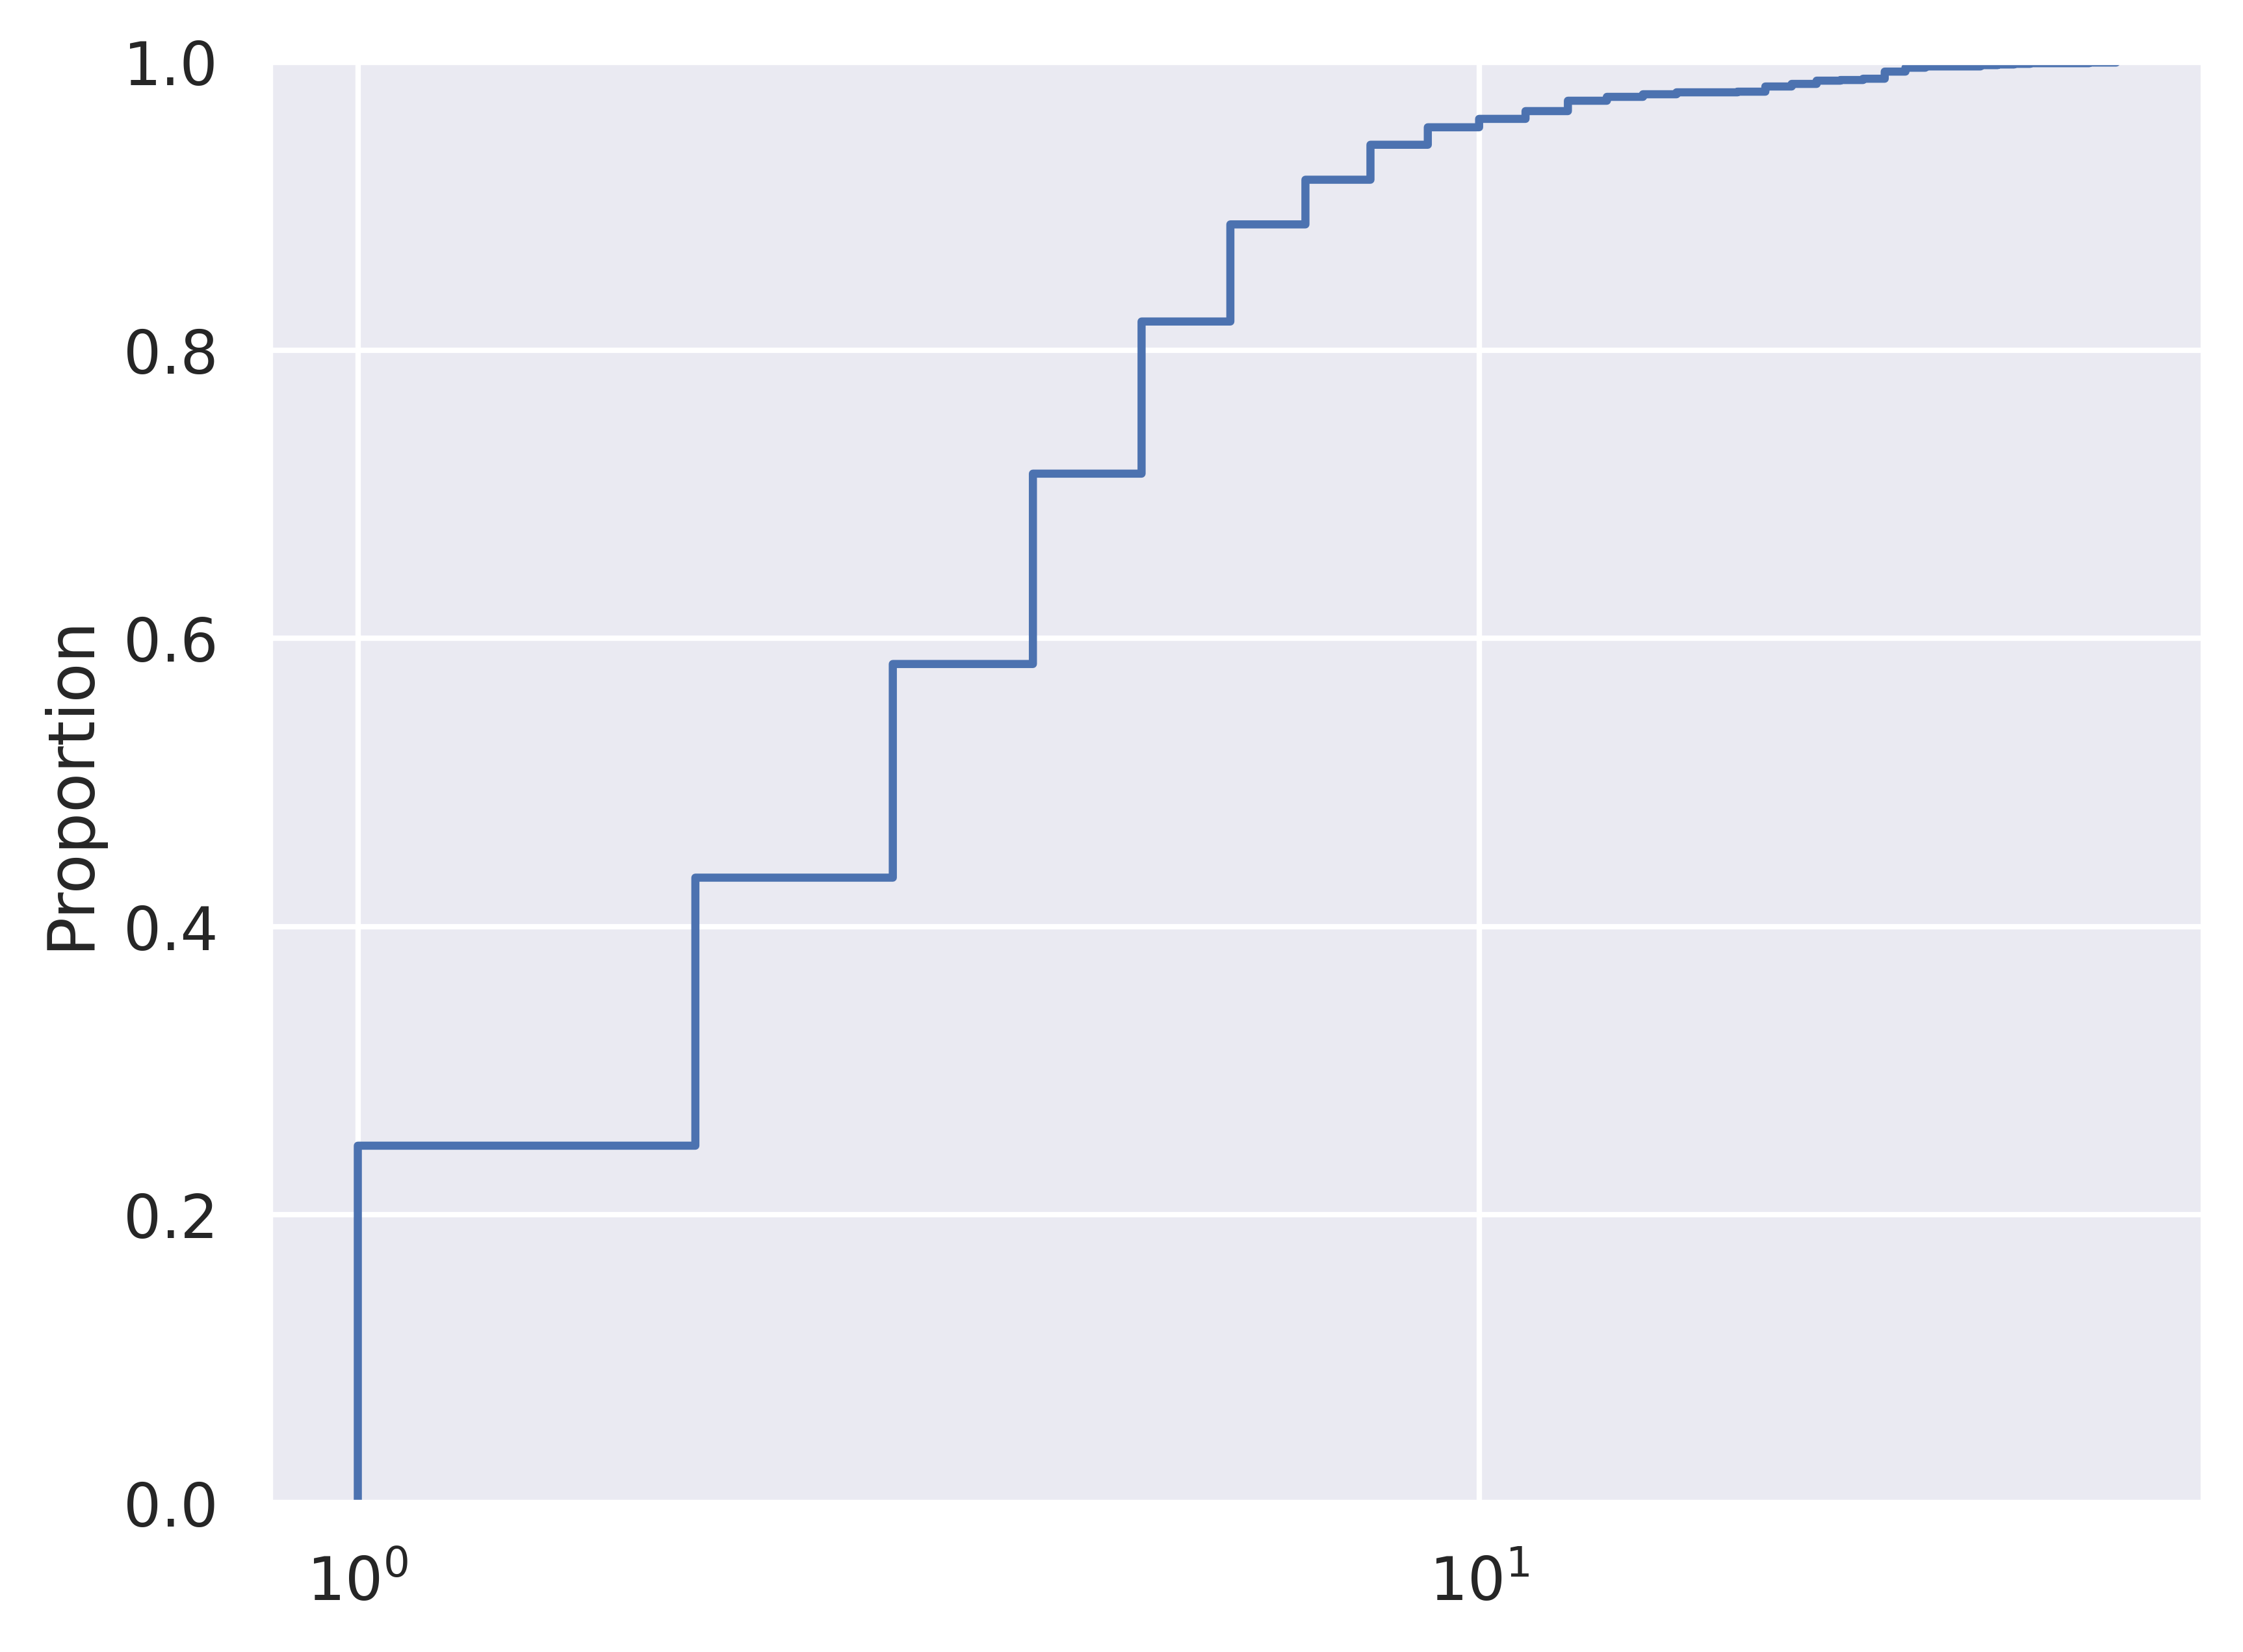

In [9]:
_toplot = dfv.groupby('proposal').size()
print(_toplot.describe(percentiles=[.5,.75,.9, .95, .99]))
print( (_toplot > 300).sum() )
sns.ecdfplot(_toplot, log_scale=True)

### Usuarios activos

In [10]:
# dfv.set_index('date').sort_index()['voter'].tolist()
# for x in dfv.set_index('date').sort_index()['voter'].items():
#     print(x)

/tmp/ipykernel_182122/3928196604.py:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


  0%|          | 0/8479 [00:00<?, ?it/s]

2019-07-14 19:50:09 2023-04-09 11:34:47


Cannot show ipywidgets in text

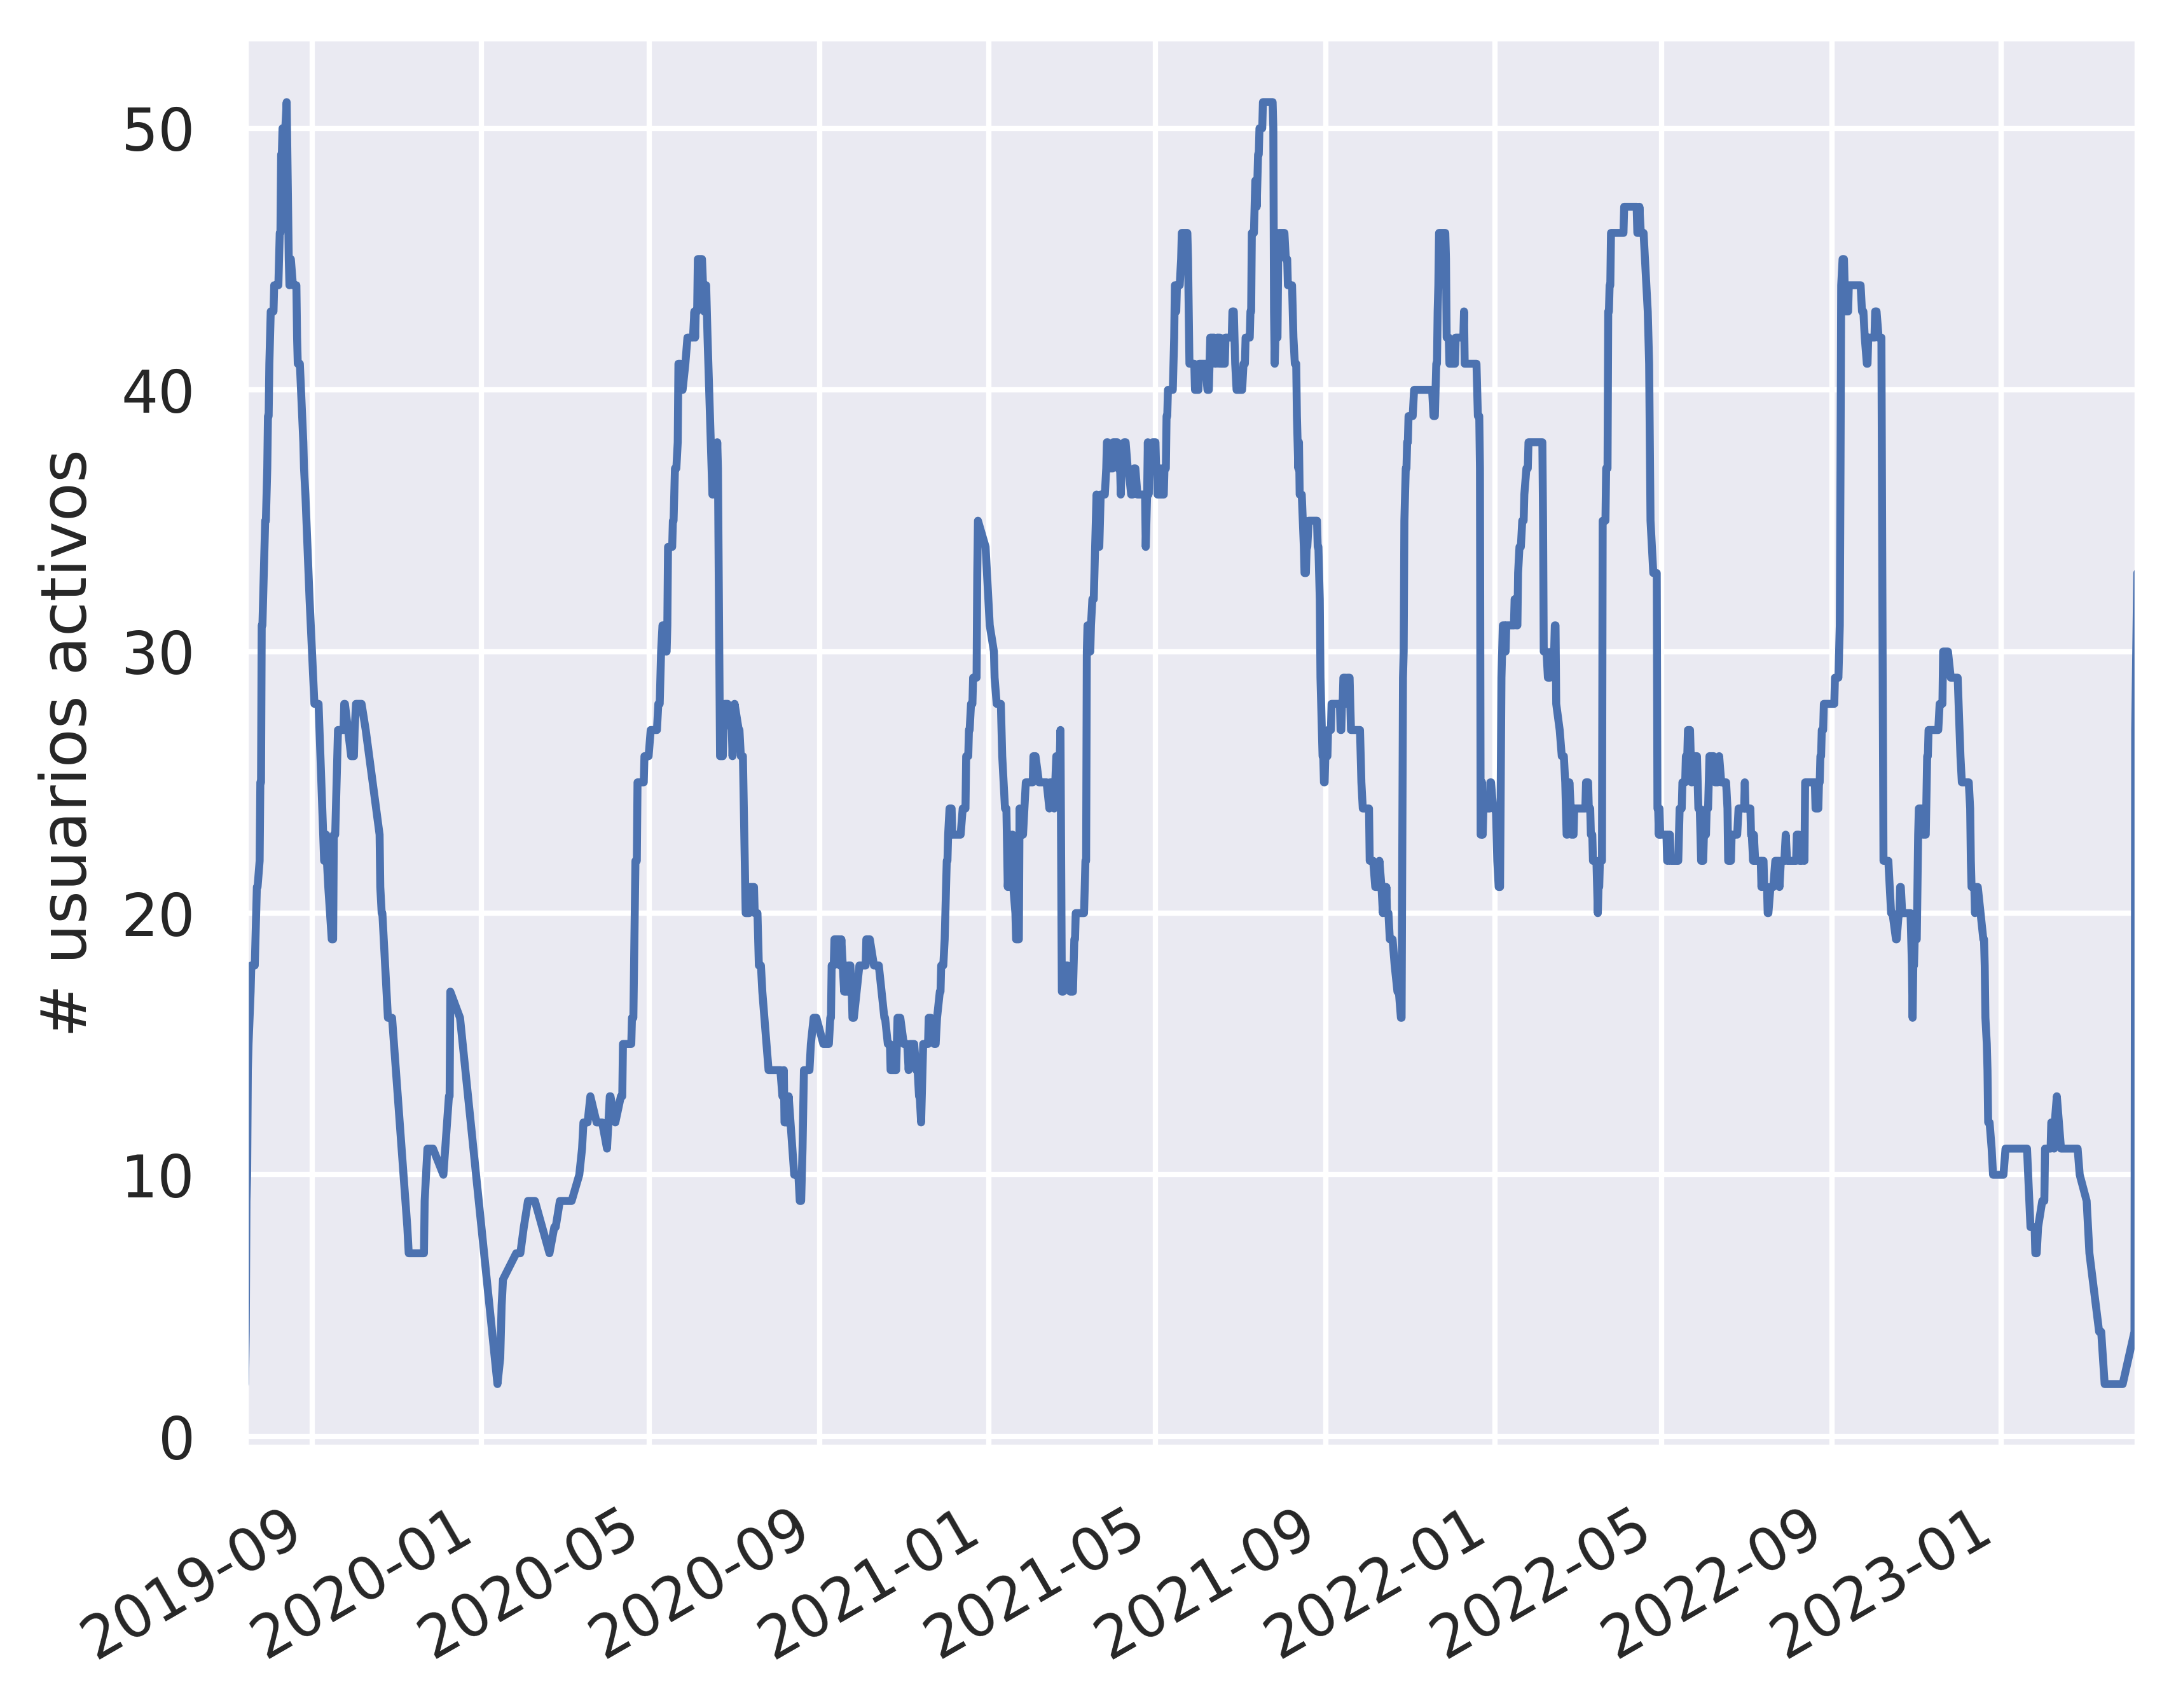

In [11]:
# import numba
from tqdm.autonotebook import tqdm
import rolling
import datetime as dt

tqdm.pandas(total=len(dfv))

# WINDOW_SIZE = '30D'
WINDOW_SIZE = dt.timedelta(days=30)

RESAMPLE_FREQ = '12h'

# @numba.jit(nopython=True)
# def nunique(arr):
#     return len(set(arr))

# Rolling no acepta tipos no númericos en la agregación, por lo que es necesario convertir la categoría a entero
# Por ejemplo, usando el código que le asigna Pandas
# dfv['ucode'] = dfv['voter'].cat.codes
#_cnt = dfv.set_index('date').sort_index().rolling(WINDOW_SIZE)['ucode'].progress_apply(nunique, raw=True).rename('cnt')

# Al final resulta que lo mejor era ir a por la solución O(1)
_voters = dfv.set_index('date').sort_index()['voter'] # .cat.codes
r = tqdm(
    rolling.arithmetic.Nunique(_voters.items(), WINDOW_SIZE, window_type='indexed'),
    total=len(dfv),
)
_cnt = pd.Series(r, index=_voters.index)
# Need to resample or there would be too many points
_cnt = _cnt.resample(RESAMPLE_FREQ).max()

print(dfv['date'].min(), dfv['date'].max())
ax = sns.lineplot(_cnt)
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# usuarios activos')
plt.xlim(dfv['date'].min(), dfv['date'].max())
nbutils.download_matplotlib(ax.figure, f'04c_rolling_voters_{WINDOW_SIZE}_{ORG_NAME}.png')

## Cuando se unen los usuarios

Es decir, cuando votan por primera vez

Cannot show ipywidgets in text

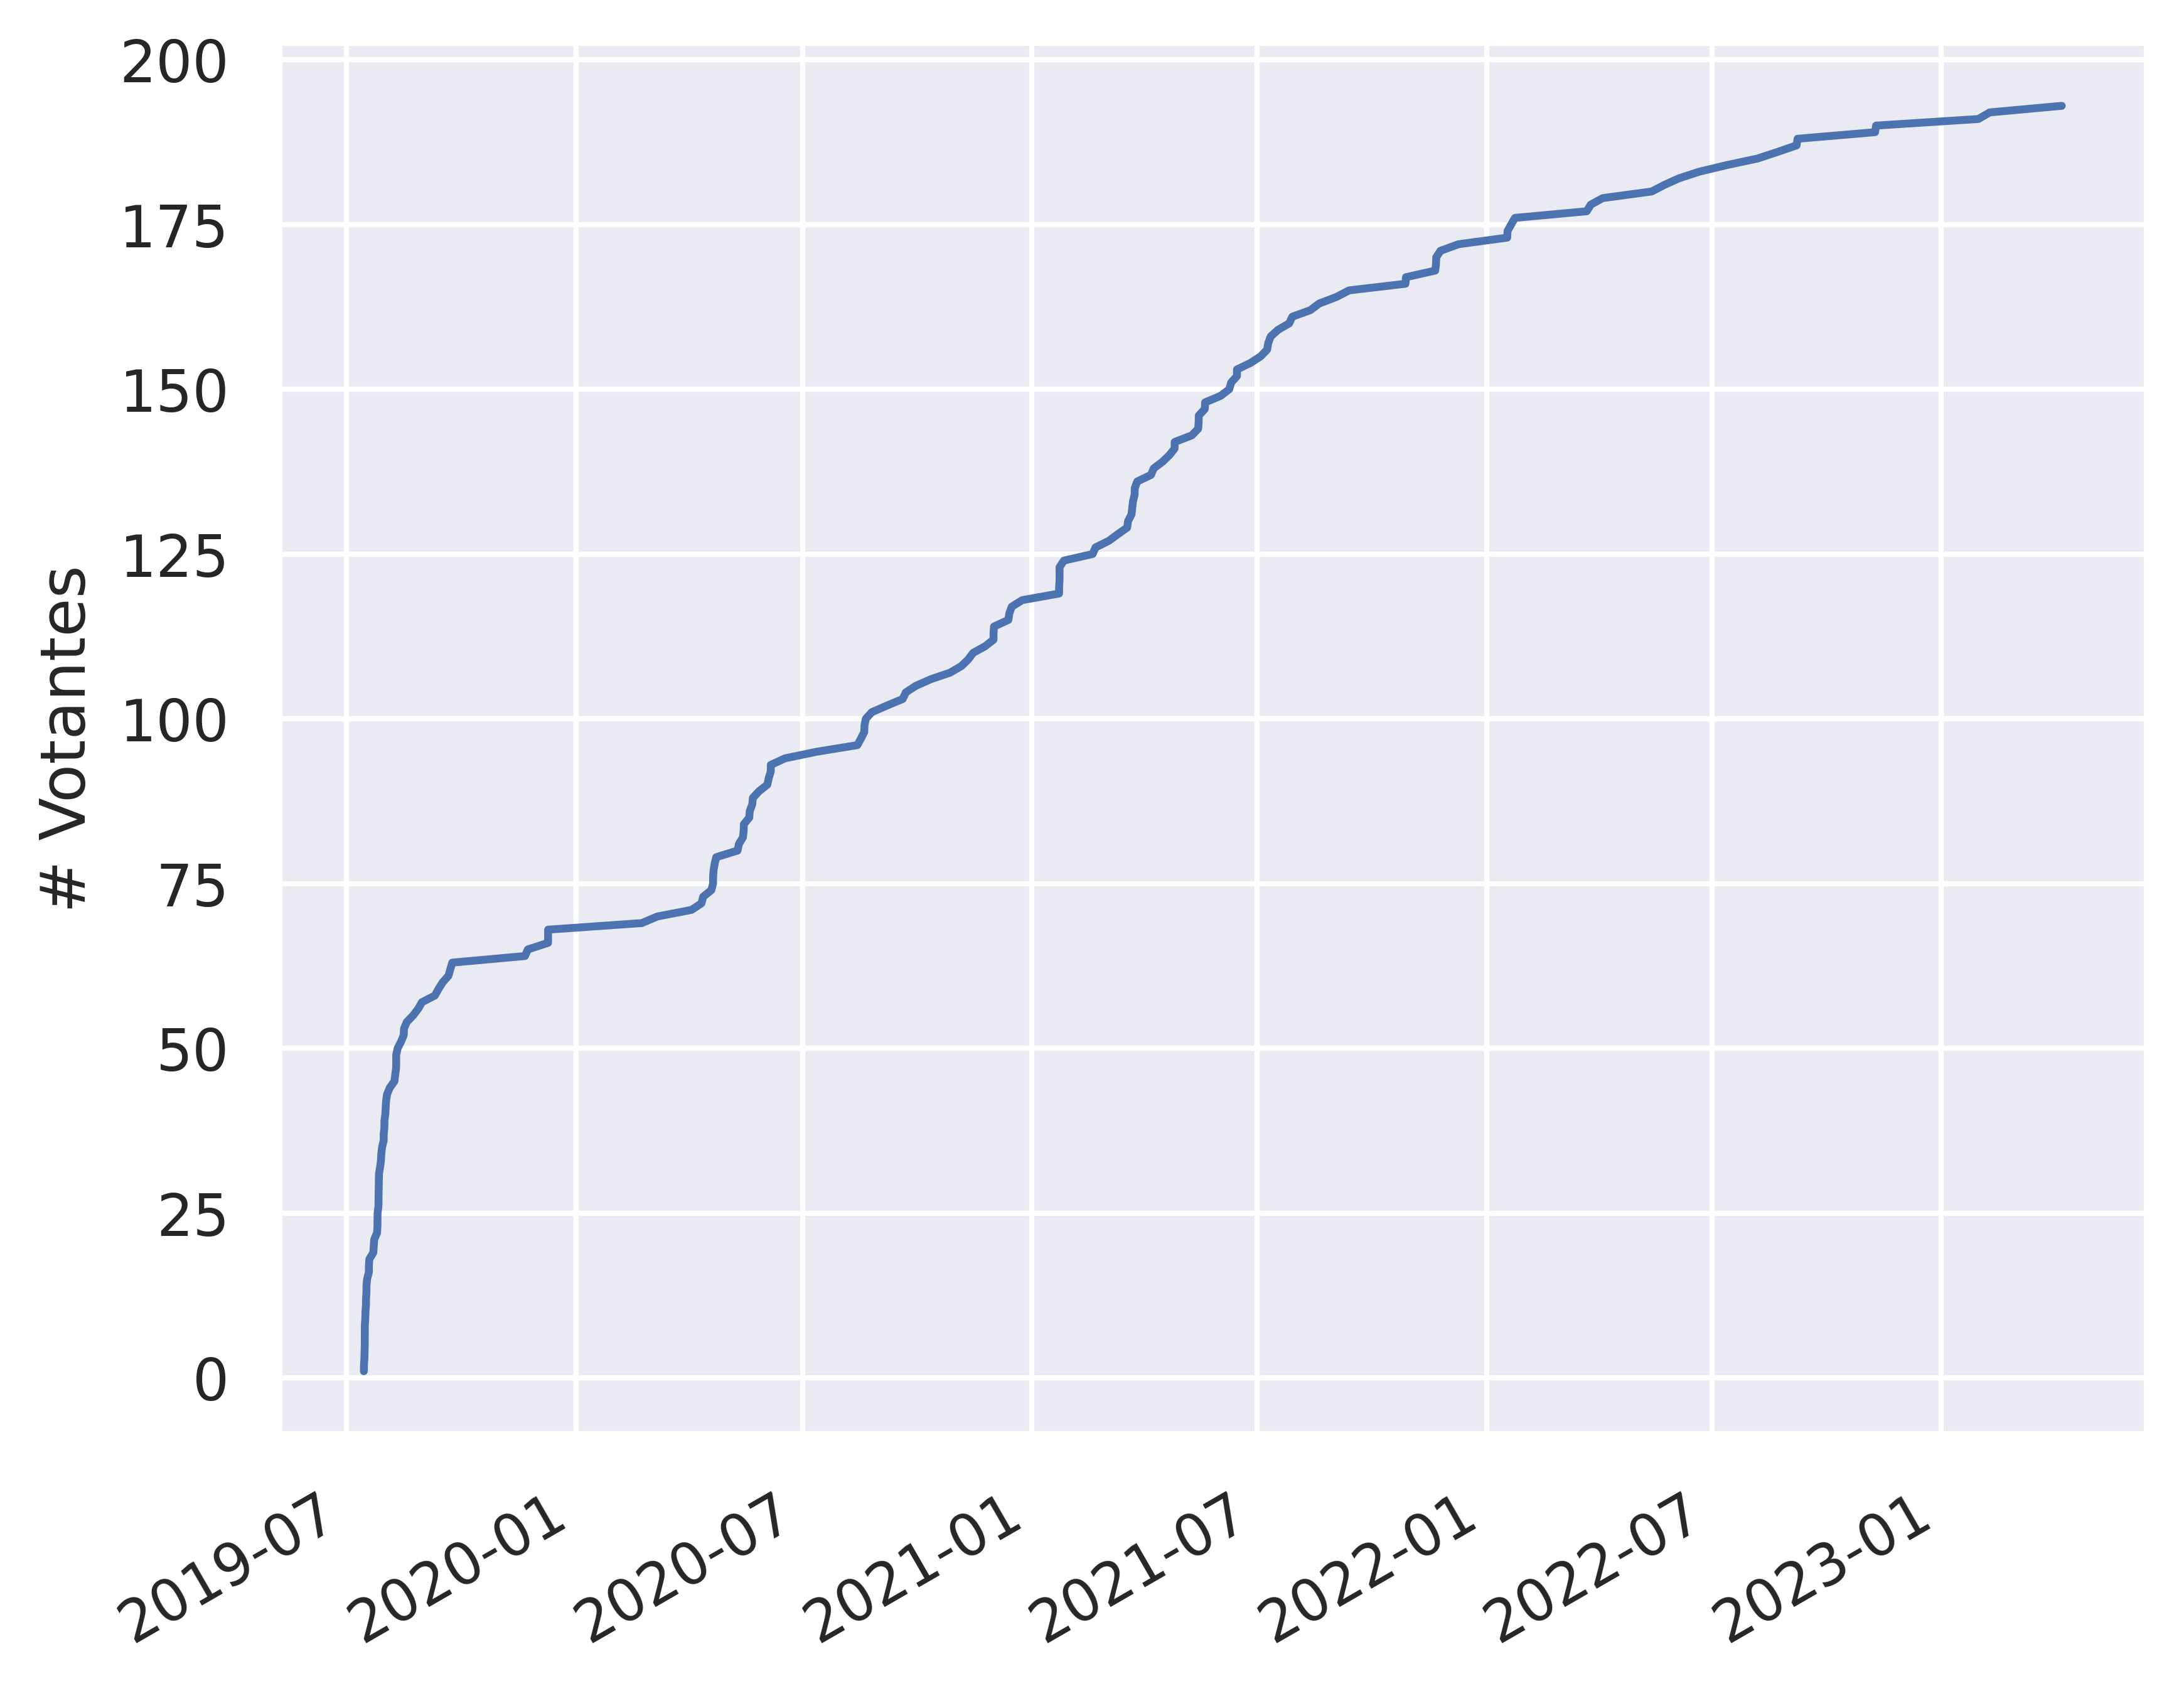

In [12]:
_toplot = dfv.groupby('voter')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Votantes')

nbutils.download_matplotlib(ax.figure, f'04_hybrid_cumcnt_users_{ORG_NAME}.pdf')

## Cuando se crean las propuestas

Cannot show ipywidgets in text

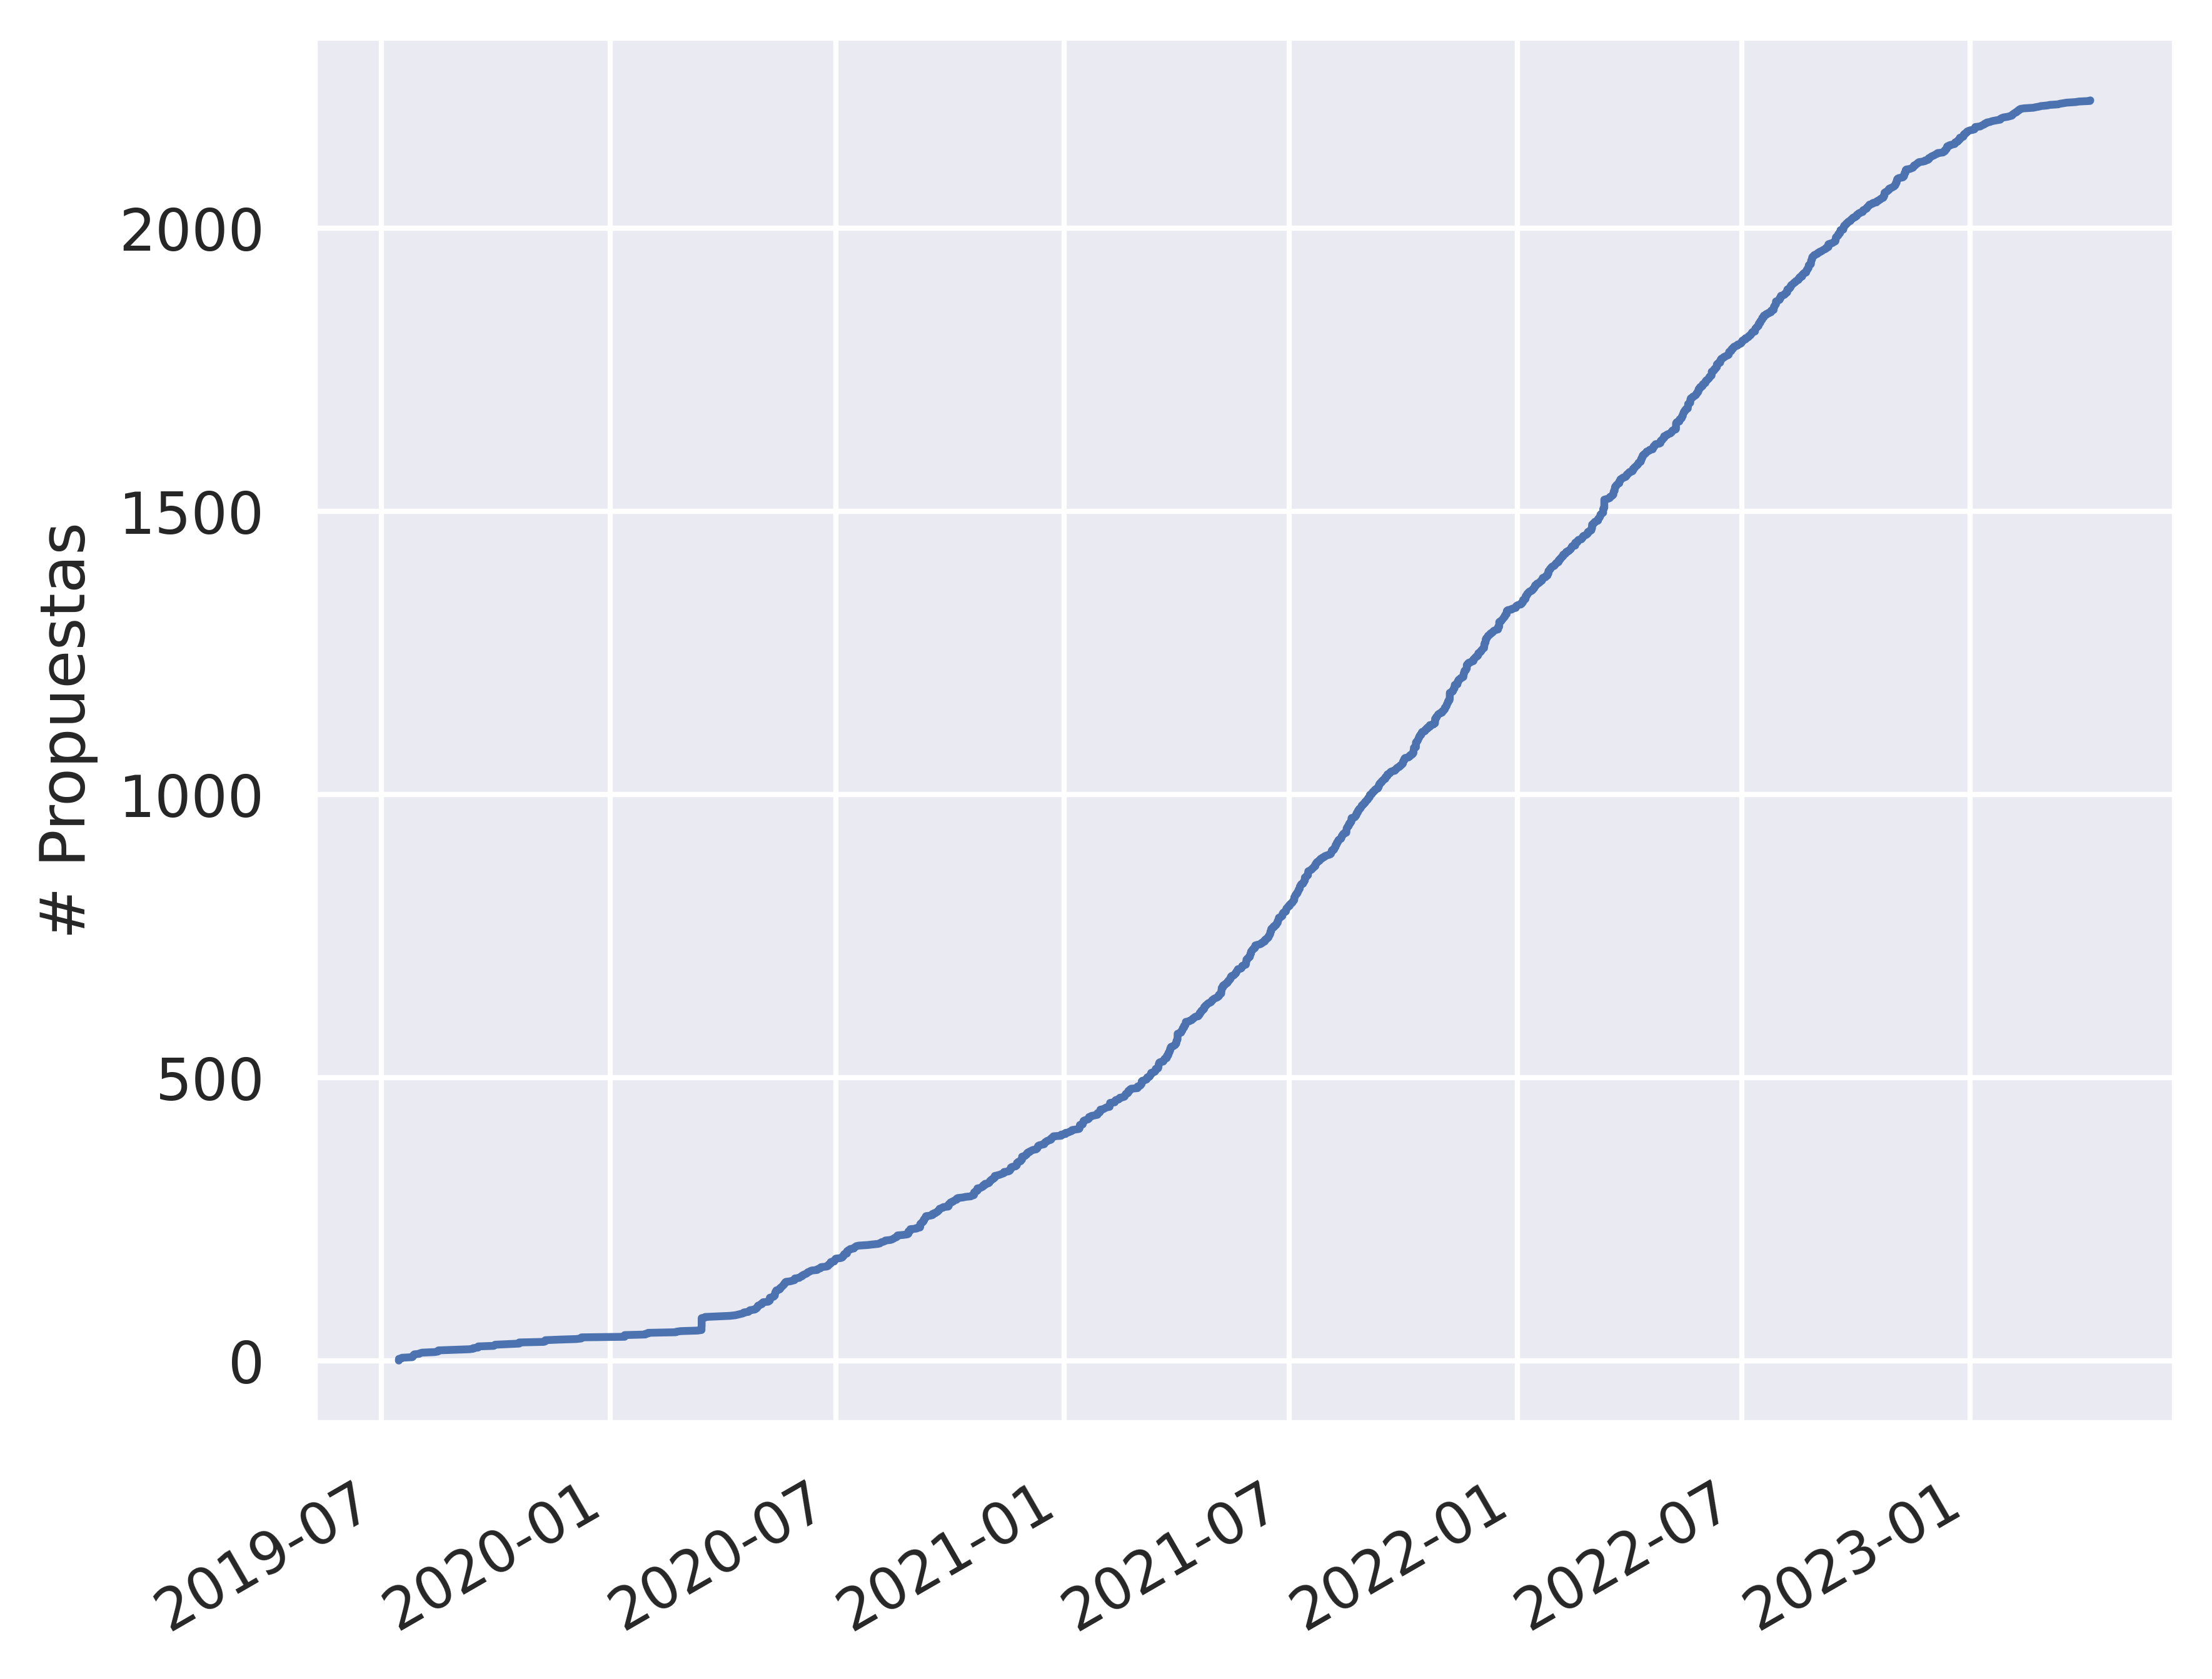

In [13]:
_toplot = dfv.groupby('proposal')['date'].min()
_toplot = _toplot.sort_values().to_frame()
_toplot['cnt'] = 1
_toplot['cumcnt'] = _toplot['cnt'].cumsum()
ax = sns.lineplot(_toplot, x='date', y='cumcnt')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('# Propuestas')

nbutils.download_matplotlib(ax.figure, f'04c_cumcnt_users_{ORG_NAME}.pdf')

Cannot show ipywidgets in text

<Figure size 3840x2880 with 0 Axes>

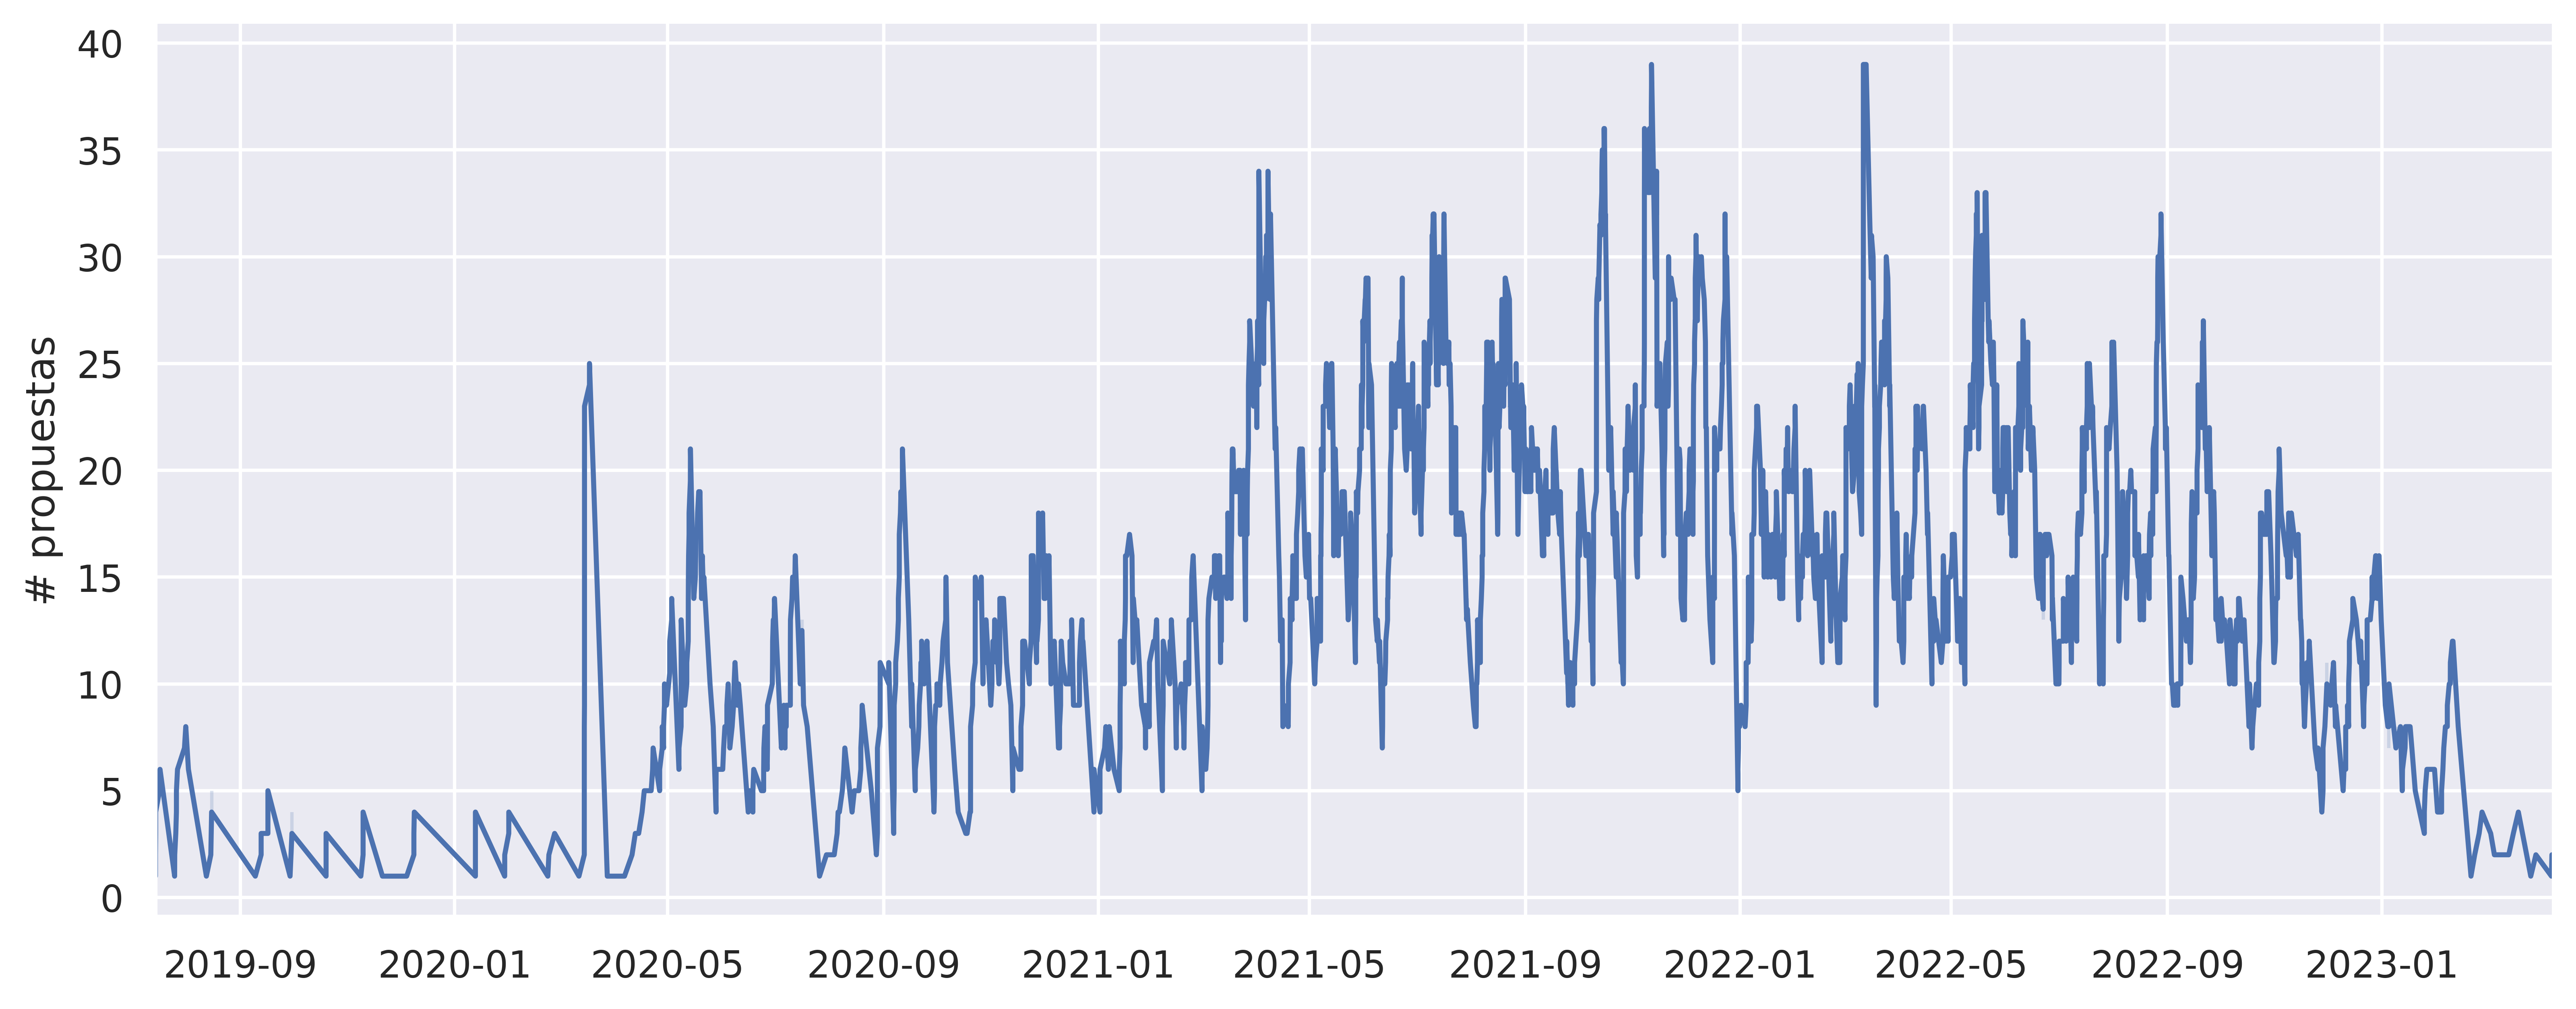

In [14]:
WINDOW_SIZE = '7D'

_toplot = dfv.groupby('proposal')['date'].min().sort_values()
_toplot = _toplot.to_frame()
_toplot['cnt'] = 1
_toplot = _toplot.rolling(window=WINDOW_SIZE, on='date').count()

# Double the width of the figure
fs = plt.gcf().get_size_inches()
plt.figure(figsize=(fs[0]*2, fs[1]))
# _toplot.set_index('date')['cnt'].plot()
ax = sns.lineplot(_toplot.set_index('date')['cnt'])

plt.xlabel('')
plt.ylabel('# propuestas')
plt.xlim(
    _toplot['date'].min(),
    _toplot['date'].max(),
)

sns.despine()
nbutils.download_matplotlib(ax.figure, f'04c_rolling_proposals_{WINDOW_SIZE}_{ORG_NAME}.pdf')

## Dia de la semana en que se votan las propuestas

> incluso, se podría hacer un heatmap X cuando se lanzan Y cuando se votan y Z (color) la frecuencia
> -- Javi

Vamos, que en esta celda vamos a intentar hacer un HEATMAP donde:
- X: dia de la semana de creación de la propuesta
- Y: dia de la semana de votación
- Z: número de votos

In [15]:
_toplot.to_numpy()

array([[Timestamp('2019-07-14 19:50:09'), 1.0],
       [Timestamp('2019-07-14 19:51:24'), 2.0],
       [Timestamp('2019-07-14 22:29:44'), 3.0],
       ...,
       [Timestamp('2023-03-29 13:17:11'), 2.0],
       [Timestamp('2023-04-07 09:43:20'), 1.0],
       [Timestamp('2023-04-07 15:37:23'), 2.0]], dtype=object)

Text(277.49999999999994, 0.5, 'Día votación')

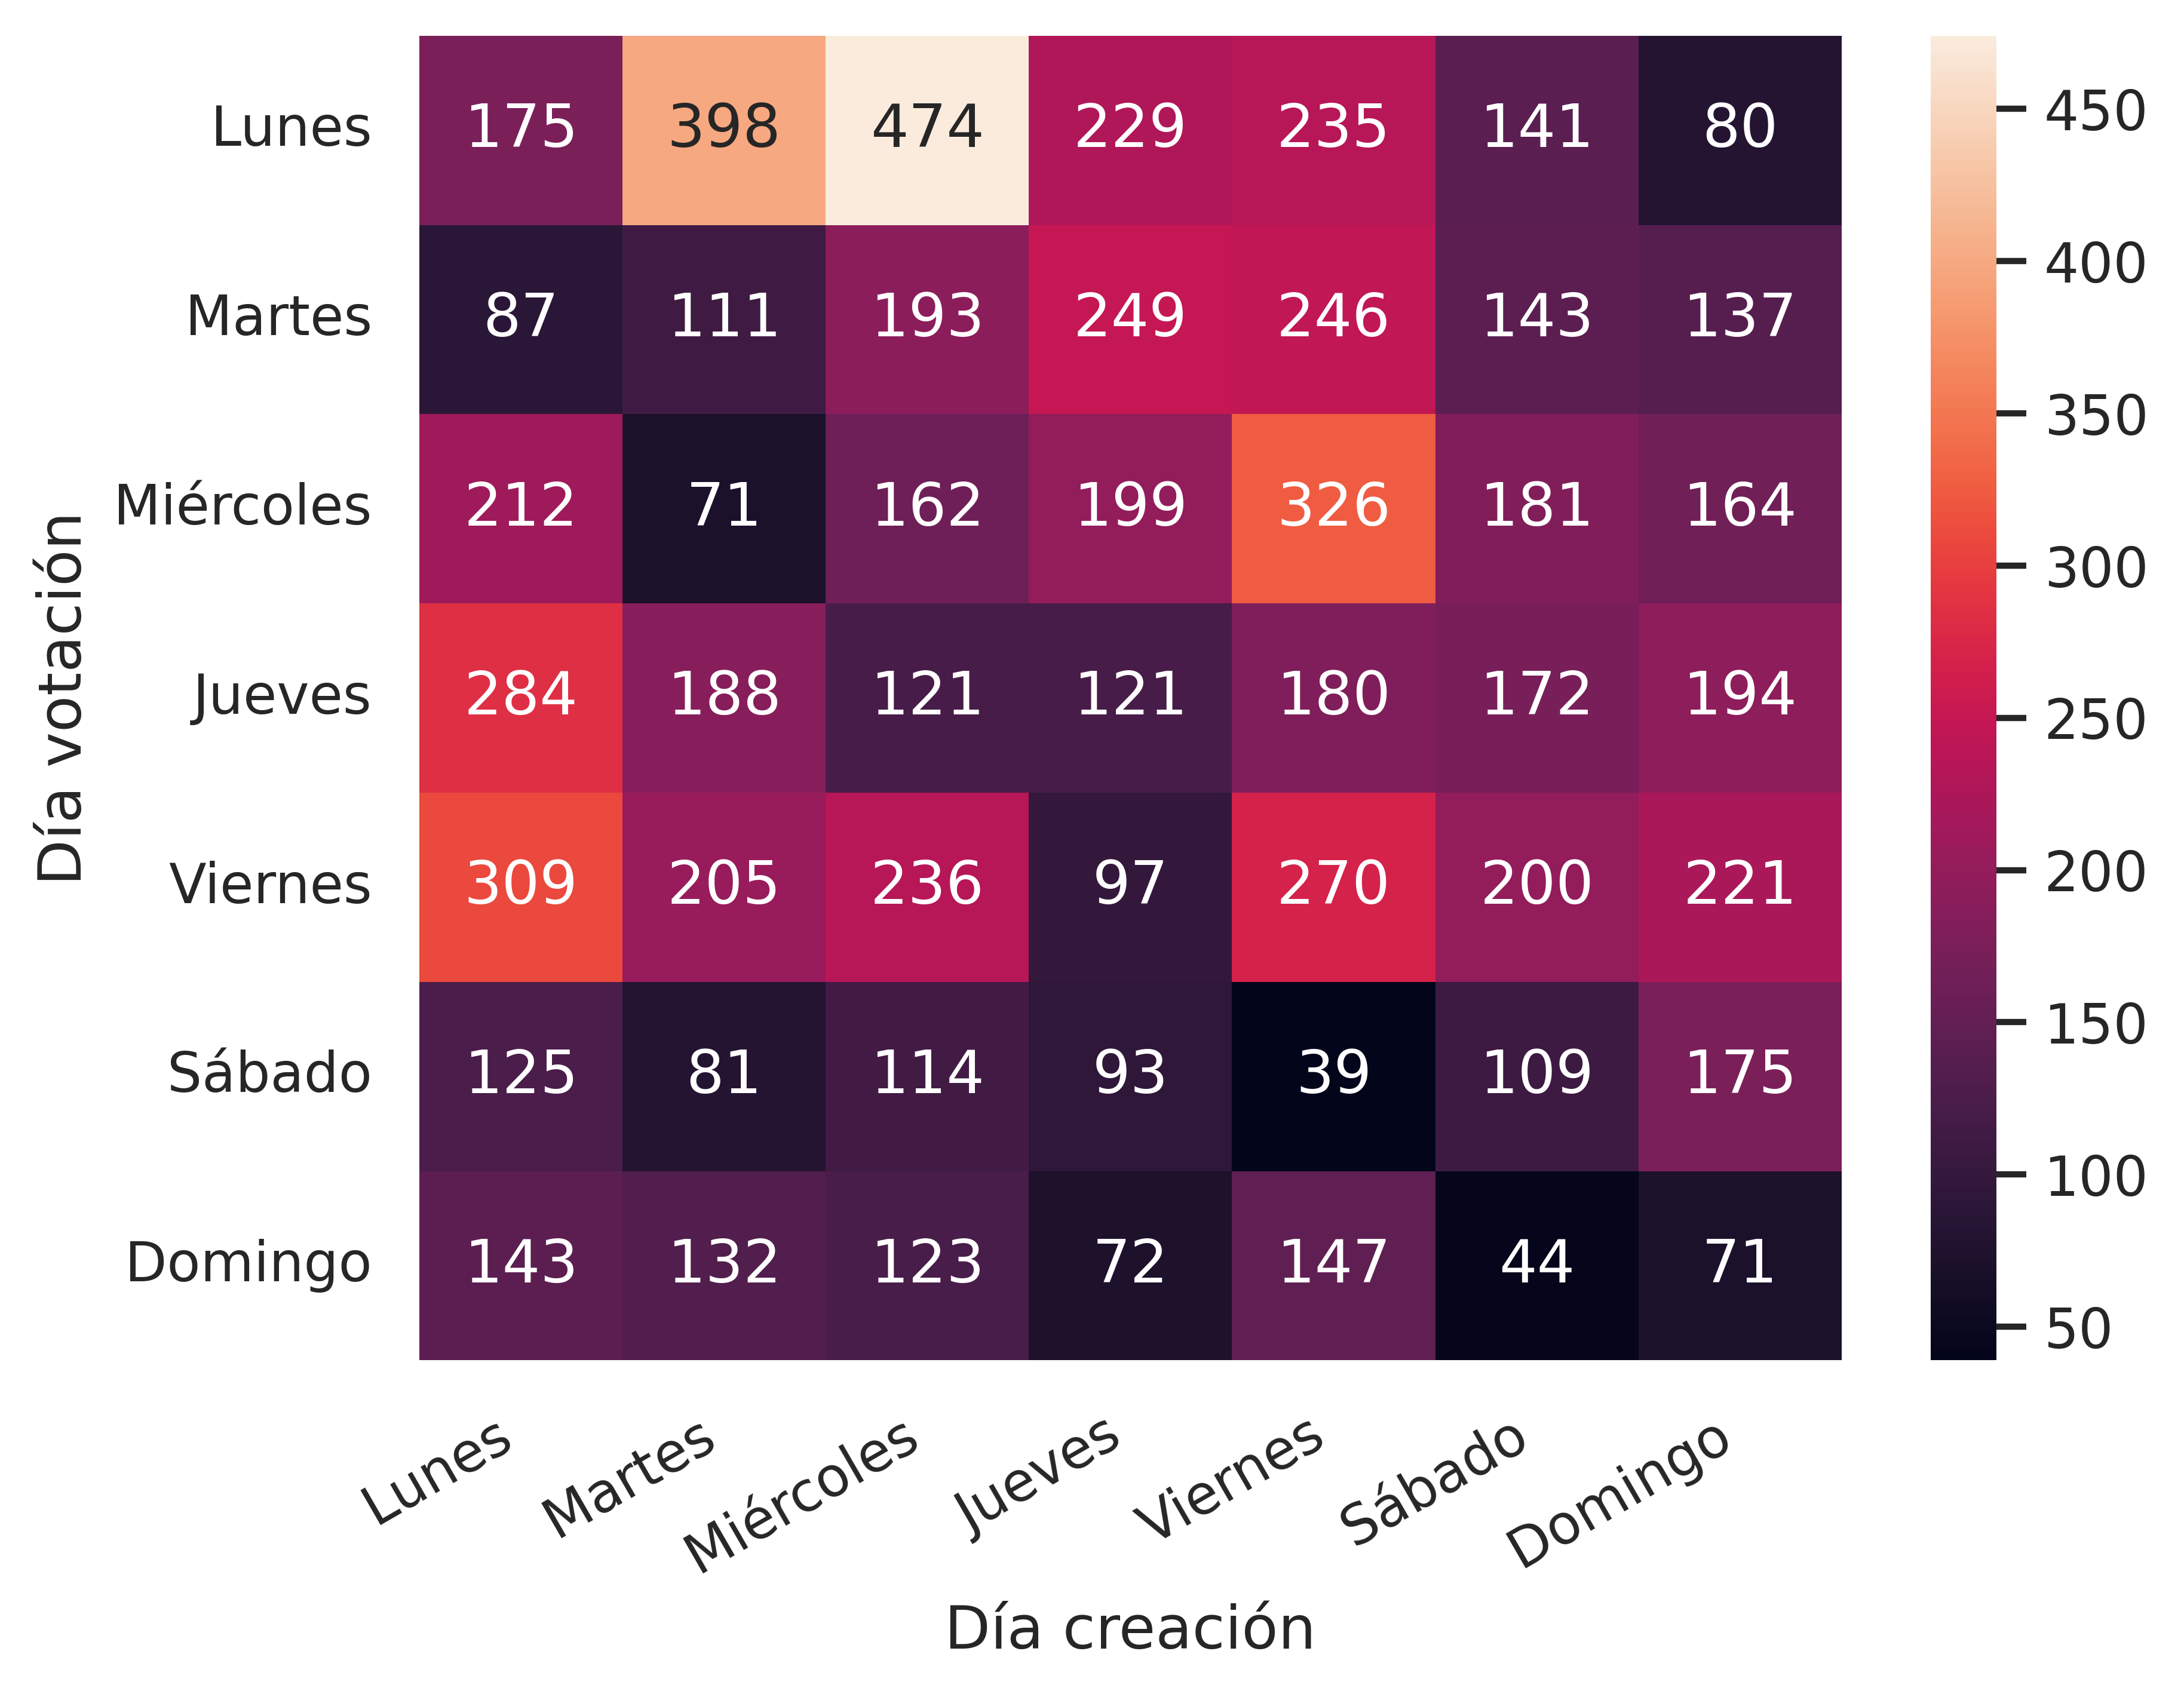

In [16]:
# In pandas, 0 = Monday
# https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.dayofweek.html

spanish_dow = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes', 
    5: 'Sábado',
    6: 'Domingo',
}

_dfvp = dfv.merge(dfp['date'].rename('proposal_date'), left_on='proposal', right_index=True)
_dfvp['date_dow'] = _dfvp['date'].dt.day_of_week
_dfvp['proposal_date_dow'] = _dfvp['proposal_date'].dt.dayofweek
# sns.load_dataset("glue").pivot(index="Model", columns="Task", values="Score")
_toplot = pd.crosstab(_dfvp['proposal_date_dow'], _dfvp['date_dow']).rename(index=spanish_dow, columns=spanish_dow)

sns.heatmap(_toplot, annot=True, fmt='g')
plt.xticks(rotation=30, ha='right')

plt.xlabel('Día creación')
plt.ylabel('Día votación')

Cannot show ipywidgets in text

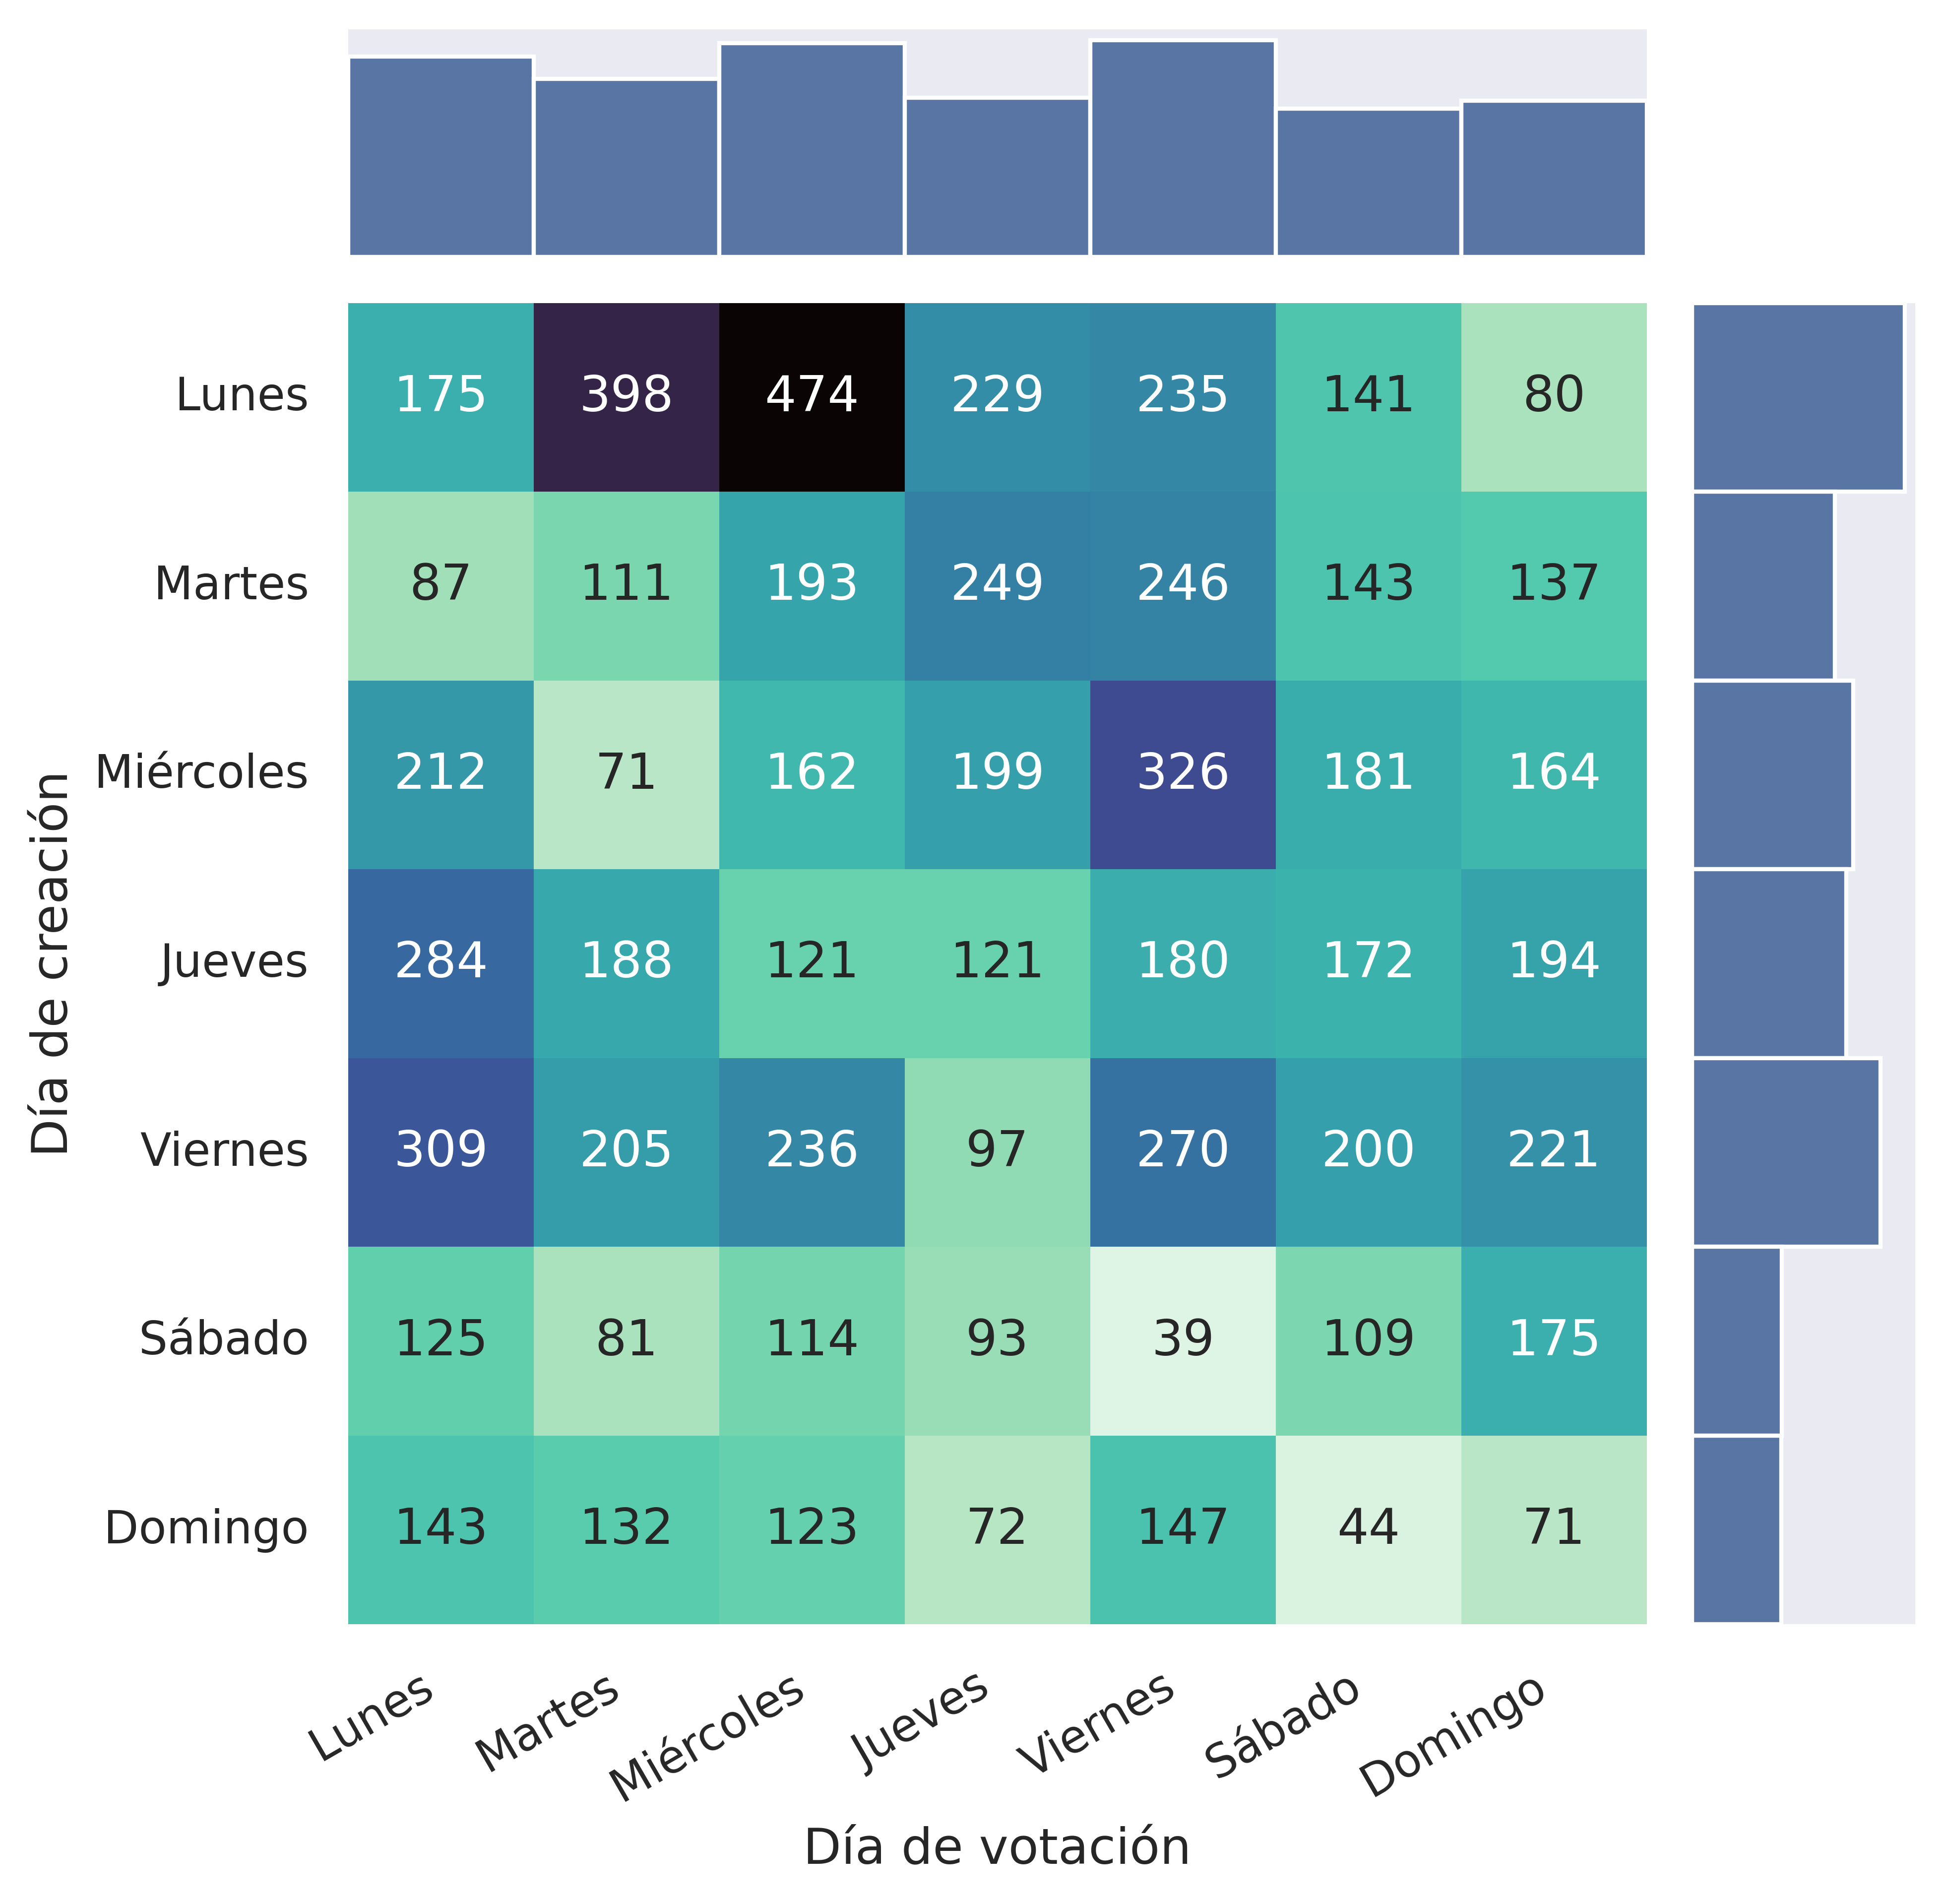

In [17]:
# _toplot = pd.crosstab(...)

grid = sns.JointGrid()

sns.heatmap(_toplot, ax=grid.ax_joint, cbar=False, annot=True, fmt='g', cmap='mako_r')
sns.barplot(_toplot.sum(), ax=grid.ax_marg_x, width=1)
sns.barplot(_toplot.sum(axis=1), ax=grid.ax_marg_y, orient='h', width=1)
_off = .5

# Fix x
_xmin, _xmax = grid.ax_joint.get_xlim()
grid.ax_joint.set_xlim(_xmin+_off, _xmax+_off)
for bar in grid.ax_marg_x.containers[0]:
    bar.set_x(bar.get_x() + _off)

# Fix y
_ymin, _ymax = grid.ax_joint.get_ylim()
grid.ax_joint.set_ylim(_ymin+_off, _ymax+_off)
for bar in grid.ax_marg_y.containers[0]:
    bar.set_y(bar.get_y() + _off)

grid.ax_joint.set_xticklabels(grid.ax_joint.get_xticklabels(), rotation=30, ha='right')
grid.ax_joint.yaxis.set_tick_params(rotation=0)

grid.ax_joint.set_xlabel('Día de votación')
grid.ax_joint.set_ylabel('Día de creación')

nbutils.download_matplotlib(grid, f'04c_heatmap_proposals_{ORG_NAME}.pdf')

<Axes: xlabel='proposal_date_dow', ylabel='count'>

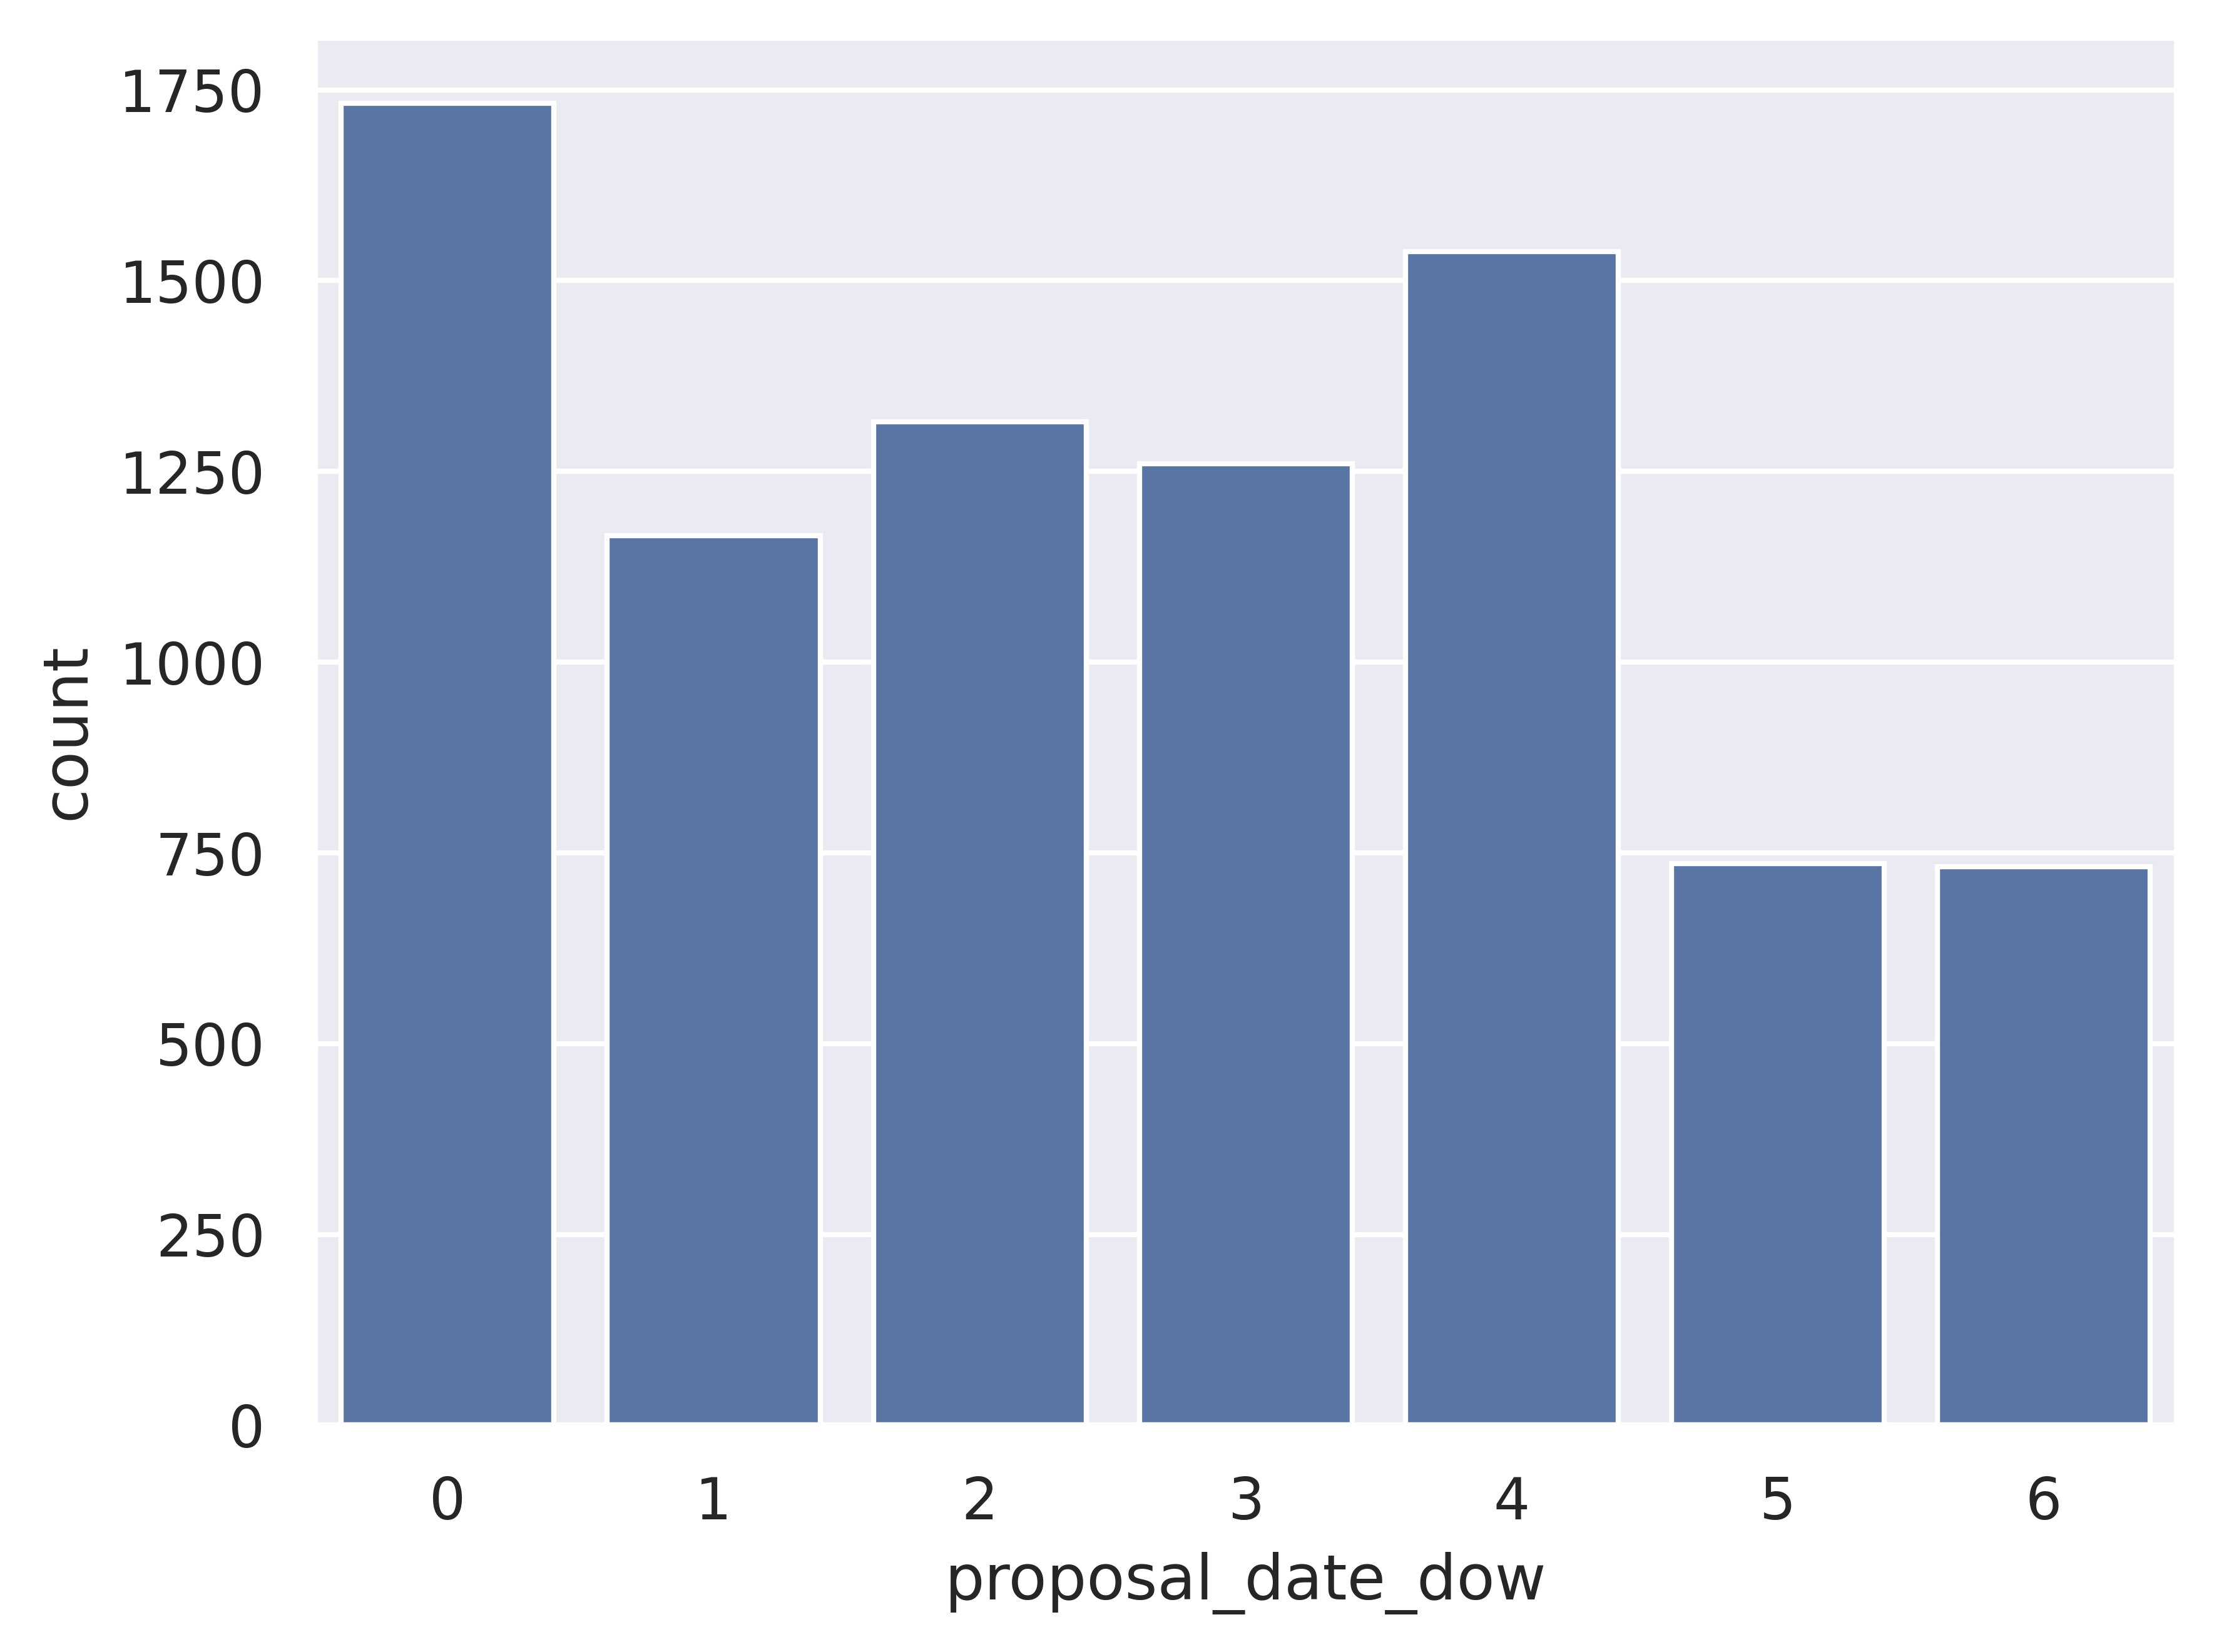

In [18]:
sns.countplot(_dfvp, x='proposal_date_dow')

<Axes: xlabel='count', ylabel='date_dow'>

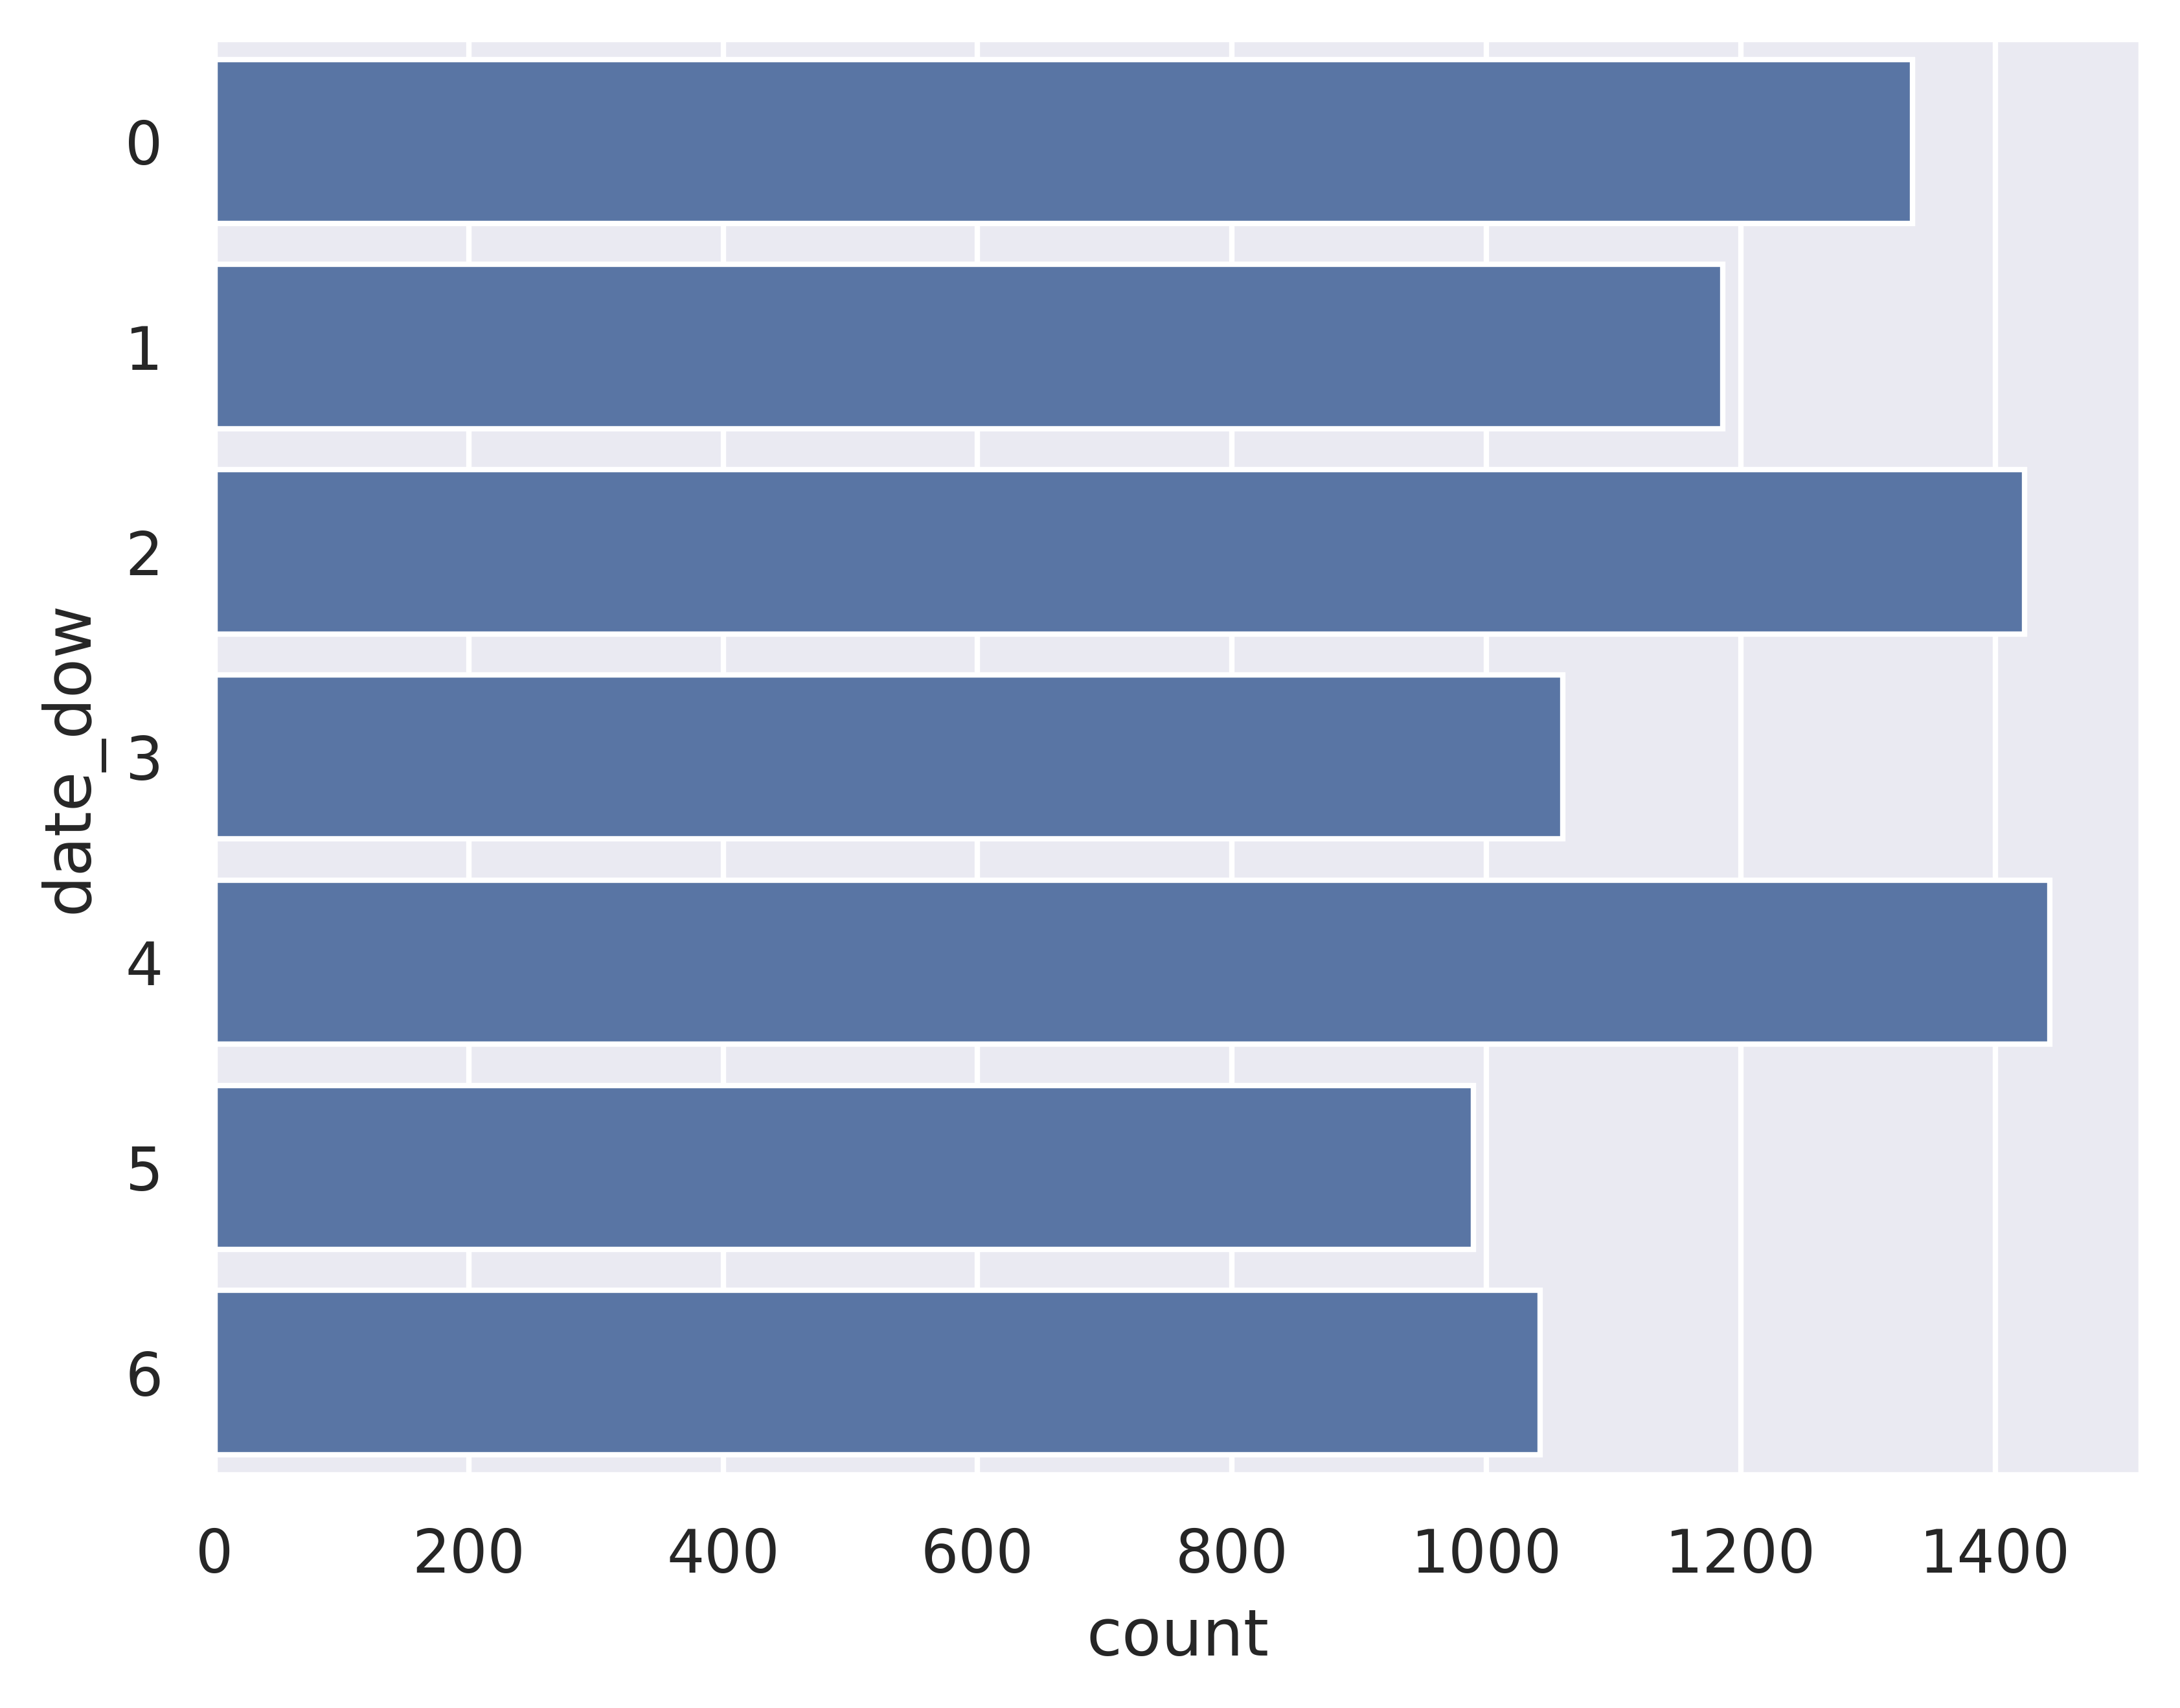

In [19]:
sns.countplot(_dfvp, y='date_dow')

## Suelen votarse las propuestas al principio o al final

In [20]:
def proposal_histogram(proposal):
    p = dfp.loc[proposal]
    _aux = dfv[dfv["proposal"] == proposal][['platform', 'name', 'date']].copy().sort_values('date')
    first_vote = p['start']
    last_vote = p['end']
    print(p['start'], p['end'], p['end'] - p['start'])
    _aux['date_rel'] = (_aux['date'] - p['start']) / (p['end'] - p['start'])
    # sns.ecdfplot(_aux['date_rel'])
    ax = sns.histplot(_aux['date_rel'])
    ax.set_title(f"Histograma de tiempo de los votos en la propuesta {proposal}")
    return ax

# proposal_histogram(proposal = "b86aa059-3d31-5d41-a472-70962816f779")

## Ahora para TODOS los votos

Cuidado que este grafo puede estar sesgado por una sola propuesta

In [21]:
dfp

platform            name  \
id                                                               
4664058c-09d3-57de-8db7-24590e824bd8  daostack  dxDAO - xDXdao   
a151f35d-eb05-5741-8077-1fc6fa51b218  daostack  dxDAO - xDXdao   
dbf6119d-b9e9-58b2-8899-2a8809c51614  daostack  dxDAO - xDXdao   
67bacc91-2e6b-5b4a-bc60-3b7681d91160  daostack  dxDAO - xDXdao   
7f9e2b9c-a64c-5245-ab60-f55580a8d281  daostack  dxDAO - xDXdao   
...                                        ...             ...   
8d21fee6-58fa-5ccd-bde7-03ab865902d1  daostack  dxDAO - xDXdao   
80afaca2-bd36-513c-989f-01087048ba00  daostack  dxDAO - xDXdao   
6bfb10c8-8742-5845-bef8-589613cb8de1  daostack  dxDAO - xDXdao   
014a42d6-45dd-585e-8362-89395bf70dbc  daostack  dxDAO - xDXdao   
65f86903-3e4d-5893-a554-c174e9080965  daostack  dxDAO - xDXdao   

                                                             platform_deployment  \
id                                                                                 
4664058c-09d3-57de-8db7-24590e824bd8  0x519b70055af55a007110b4ff99b0ea33071c720a   
a151f35d-eb05-5741-8077-1fc6fa51b218  0x519b70055af55a007110b4ff99b0ea33071c720a   
dbf6119d-b9e9-58b2-8899-2a8809c51614  0x519b70055af55a007110b4ff99b0ea33071c720a   
67bacc91-2e6b-5b4a-bc60-3b7681d91160  0x519b70055af55a007110b4ff99b0ea33071c720a   
7f9e2b9c-a64c-5245-ab60-f55580a8d281  0x519b70055af55a007110b4ff99b0ea33071c720a   
...                                                                          ...   
8d21fee6-58fa-5ccd-bde7-03ab865902d1  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   
80afaca2-bd36-513c-989f-01087048ba00  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   
6bfb10c8-8742-5845-bef8-589613cb8de1  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   
014a42d6-45dd-585e-8362-89395bf70dbc  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   
65f86903-3e4d-5893-a554-c174e9080965  0xe716ec63c5673b3a4732d22909b38d779fa47c3f   

                                                                deployment  \
id                                                                           
4664058c-09d3-57de-8db7-24590e824bd8  d3229595-ac4c-55bf-9808-386fc5603bd1   
a151f35d-eb05-5741-8077-1fc6fa51b218  d3229595-ac4c-55bf-9808-386fc5603bd1   
dbf6119d-b9e9-58b2-8899-2a8809c51614  d3229595-ac4c-55bf-9808-386fc5603bd1   
67bacc91-2e6b-5b4a-bc60-3b7681d91160  d3229595-ac4c-55bf-9808-386fc5603bd1   
7f9e2b9c-a64c-5245-ab60-f55580a8d281  d3229595-ac4c-55bf-9808-386fc5603bd1   
...                                                                    ...   
8d21fee6-58fa-5ccd-bde7-03ab865902d1  5deda895-4531-539a-b7dc-88797456ded7   
80afaca2-bd36-513c-989f-01087048ba00  5deda895-4531-539a-b7dc-88797456ded7   
6bfb10c8-8742-5845-bef8-589613cb8de1  5deda895-4531-539a-b7dc-88797456ded7   
014a42d6-45dd-585e-8362-89395bf70dbc  5deda895-4531-539a-b7dc-88797456ded7   
65f86903-3e4d-5893-a554-c174e9080965  5deda895-4531-539a-b7dc-88797456ded7   

                                                                      platform_proposal  \
id                                                                                        
4664058c-09d3-57de-8db7-24590e824bd8  0x003c109411e96e5607ce609278536262e12afdaa65ab...   
a151f35d-eb05-5741-8077-1fc6fa51b218  0x00a6fff3bc39d362f1153029f9105ea14c080ebbf475...   
dbf6119d-b9e9-58b2-8899-2a8809c51614  0x010c938f9cd050e3e3112fc1241a62583dec1ad09b9a...   
67bacc91-2e6b-5b4a-bc60-3b7681d91160  0x011f8609171d99705dda26d2d82cdcc691cdf8916997...   
7f9e2b9c-a64c-5245-ab60-f55580a8d281  0x01307fd72aa360c5c2964867c47ef46afd3fa4c83a94...   
...                                                                                 ...   
8d21fee6-58fa-5ccd-bde7-03ab865902d1  0xfeb2d79cd1e17a3e3f1b22b15a3b86d6284a1415dea8...   
80afaca2-bd36-513c-989f-01087048ba00  0xfeea9d463a997be8e640ecfdc7b8179e7424ebe8c0d8...   
6bfb10c8-8742-5845-bef8-589613cb8de1  0xff32174f3f2ff80955d5075937f72d07f5bc18364946...   
014a42d6-45dd-585e-8362-89395bf70dbc  0xff6c045d9ab8f514b7dce6317ac1ff

Text(0.5, 1.0, 'Histograma de todos los votos realizados en dxDAO - xDXdao')

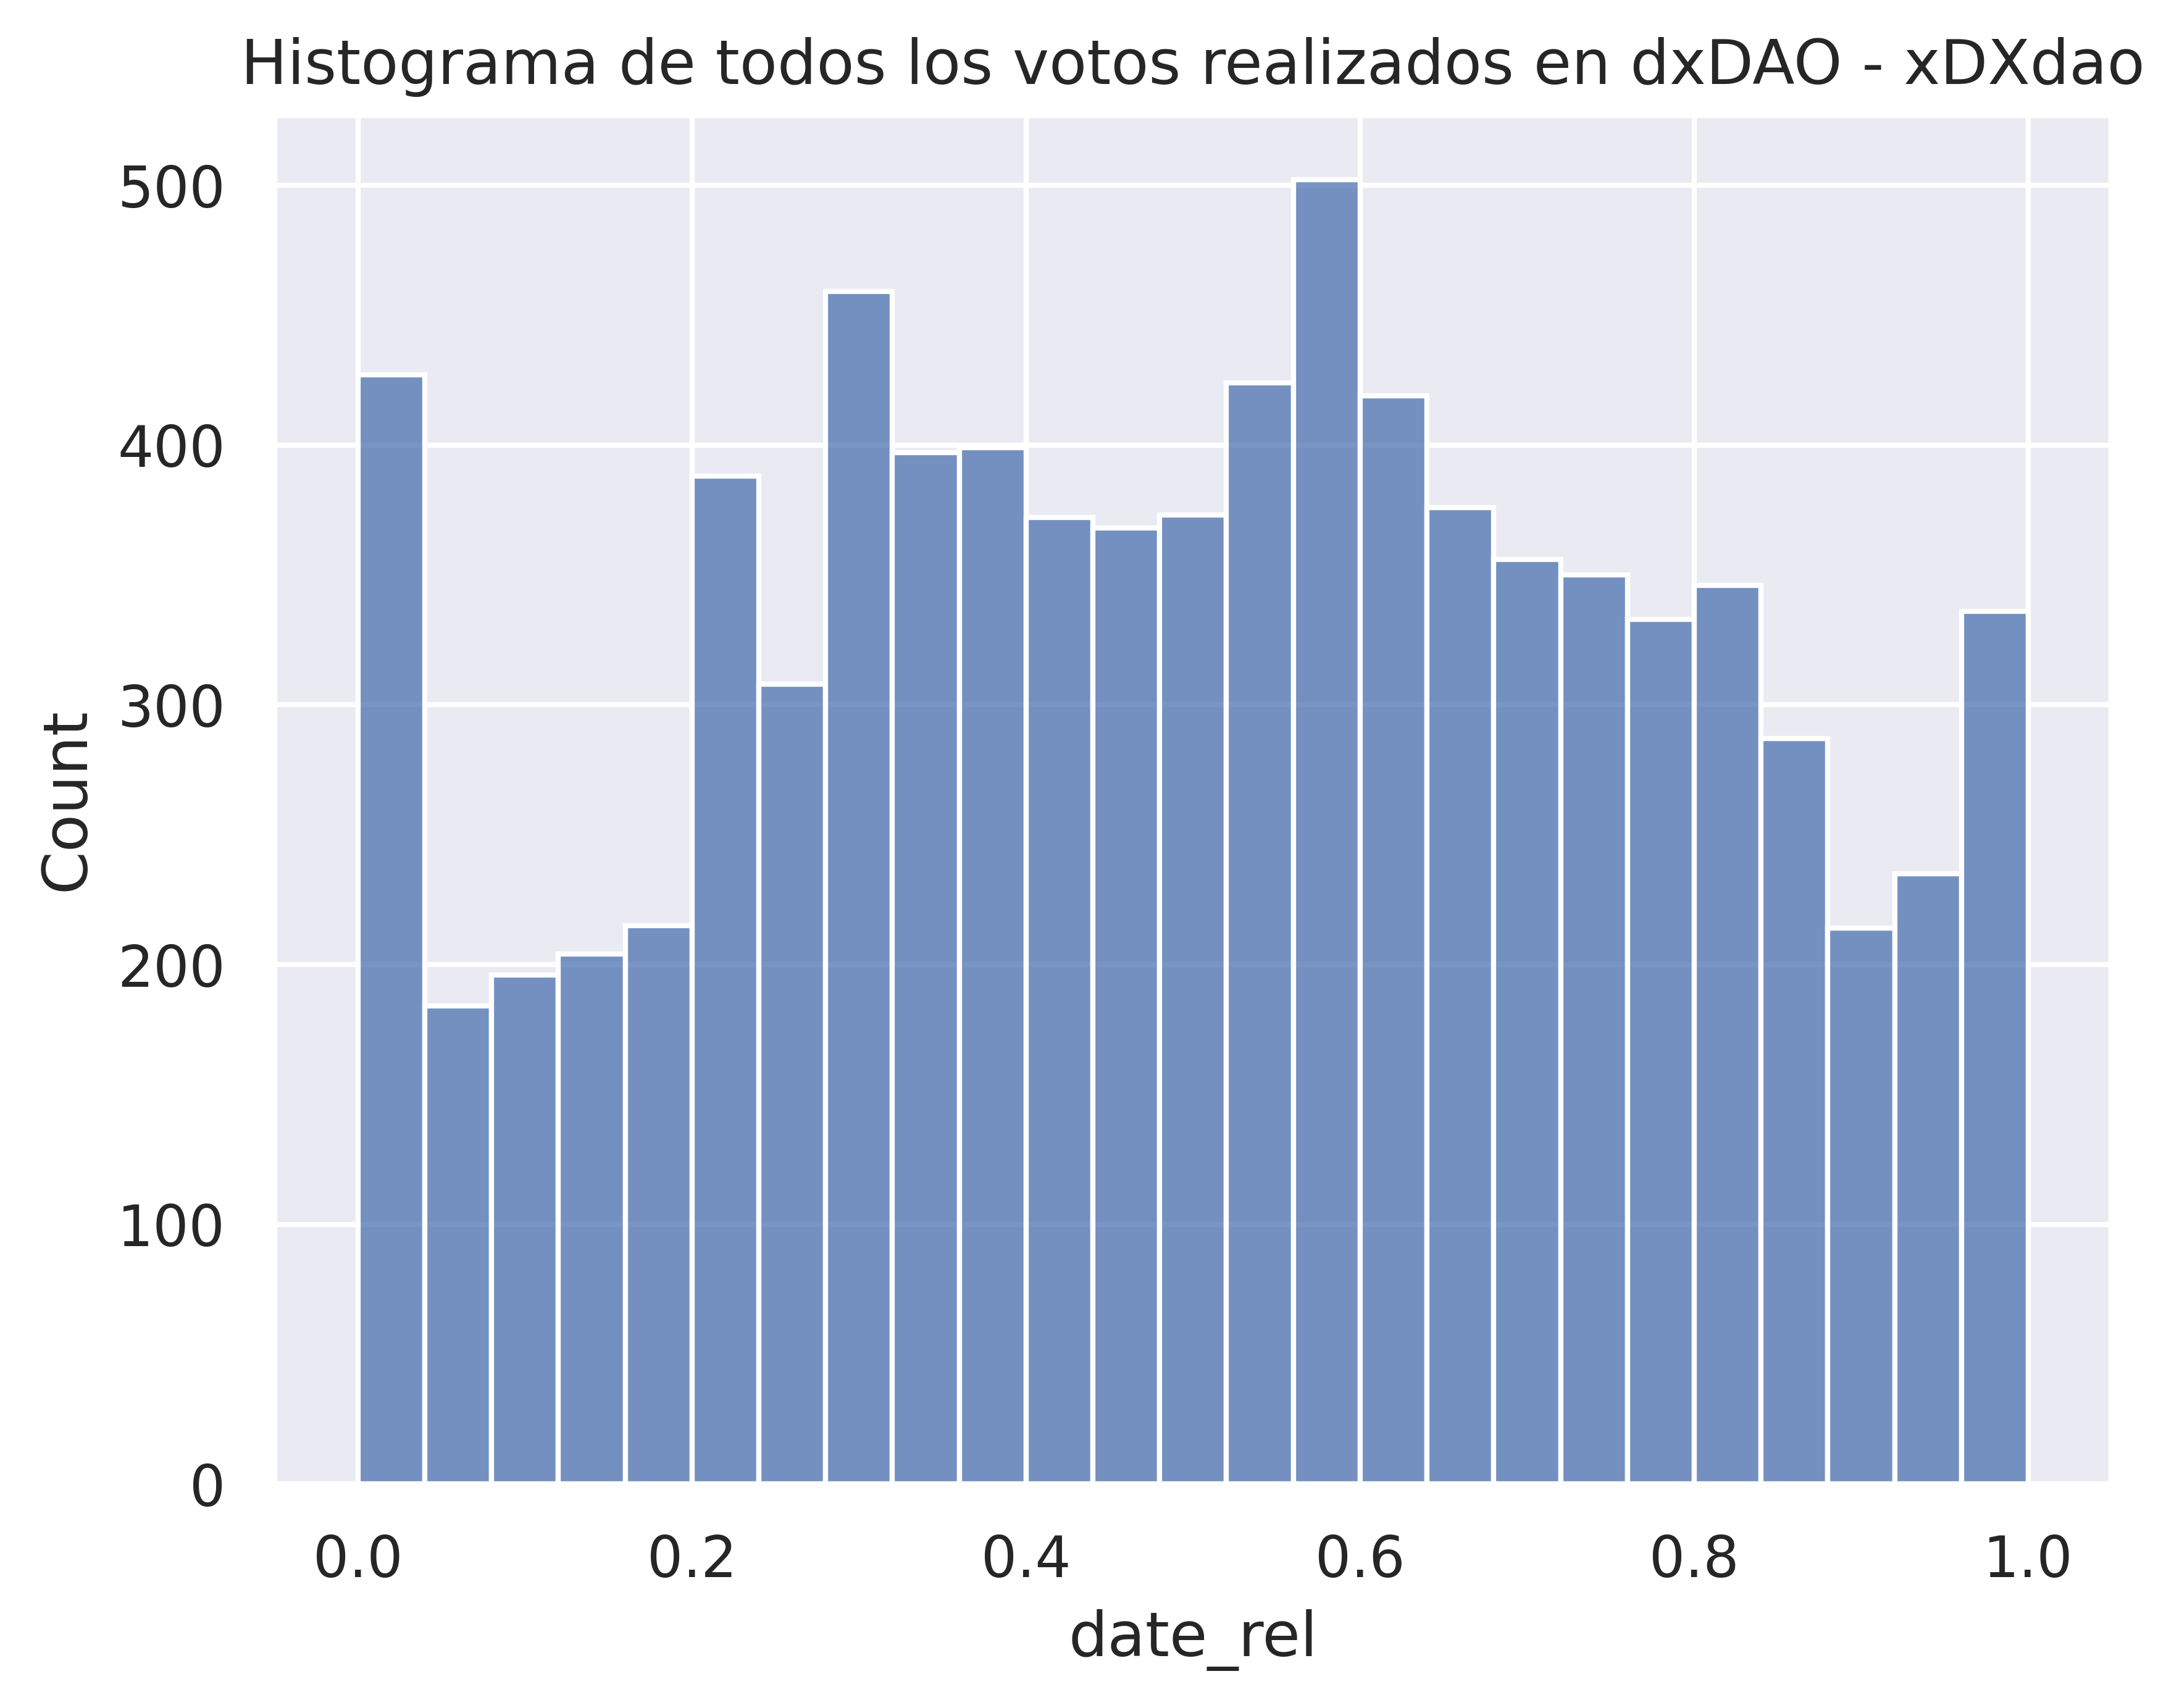

In [22]:
_dfv = dfv[['platform', 'name', 'proposal', 'date']].merge(dfp[['start', 'end']], left_on='proposal', right_index=True).sort_values('date')
_dfv['date_rel'] = (_dfv['date'] - _dfv['start']) / (_dfv['end'] - _dfv['start'])
ax = sns.histplot(_dfv, x='date_rel')
ax.set_title(f"Histograma de todos los votos realizados en {ORG_NAME}")

In [23]:
_dfv[['date_rel']].describe(percentiles=[.1,.25,.5,.75,.78,.8])

date_rel
count  8468.000000
mean      0.504907
std       0.269276
min       0.000014
10%       0.129341
25%       0.297197
50%       0.515967
75%       0.718837
78%       0.745580
80%       0.767202
max       1.000000

### Cuando son los votos (histograma distribución en tiempo de TODOS los votos)

Vamos a intentar calcular la frecuencia relativa acumulada

In [24]:
rel = (1 / _dfv.groupby('proposal').size()).rename('freq')
_dfv2 = _dfv.join(rel, on='proposal')
_dfv2['cumfreq'] = _dfv2.groupby('proposal')['freq'].cumsum()
_dfv2

platform            name                              proposal  \
1829  daostack  dxDAO - xDXdao  82f205b3-1f75-5da5-973a-fc2e324d8719   
396   daostack  dxDAO - xDXdao  b1f193e6-cf73-5a7a-85f3-a84d95c08b97   
2421  daostack  dxDAO - xDXdao  b1f193e6-cf73-5a7a-85f3-a84d95c08b97   
2287  daostack  dxDAO - xDXdao  398d685b-8c4f-5b7d-a7d6-86f1fc78efa4   
1811  daostack  dxDAO - xDXdao  cb124ba8-a044-5790-8da9-43129a92c1f5   
...        ...             ...                                   ...   
2325  daostack  dxDAO - xDXdao  783c82b4-a78e-58ee-972e-08a8d5677735   
528   daostack  dxDAO - xDXdao  783c82b4-a78e-58ee-972e-08a8d5677735   
804   daostack  dxDAO - xDXdao  783c82b4-a78e-58ee-972e-08a8d5677735   
796   daostack  dxDAO - xDXdao  783c82b4-a78e-58ee-972e-08a8d5677735   
1347  daostack  dxDAO - xDXdao  783c82b4-a78e-58ee-972e-08a8d5677735   

                    date               start                 end  date_rel  \
1829 2019-07-14 19:50:09 2019-07-14 12:18:18 2019-08-25 19:24:15  0.007419   
396  2019-07-14 19:51:24 2019-07-14 12:15:47 2019-10-12 12:16:22  0.003516   
2421 2019-07-14 22:24:38 2019-07-14 12:15:47 2019-10-12 12:16:22  0.004698   
2287 2019-07-14 22:29:44 2019-07-14 14:48:30 2019-08-28 14:48:52  0.007118   
1811 2019-07-14 22:31:43 2019-07-14 14:07:23 2019-10-12 15:41:19  0.003889   
...                  ...                 ...                 ...       ...   
2325 2023-04-08 07:38:59 2023-04-05 13:21:11 2023-04-09 11:34:47  0.703587   
528  2023-04-08 13:45:11 2023-04-05 13:21:11 2023-04-09 11:34:47  0.768360   
804  2023-04-08 18:13:23 2023-04-05 13:21:11 2023-04-09 11:34:47  0.815799   
796  2023-04-09 08:40:35 2023-04-05 13:21:11 2023-04-09 11:34:47  0.969188   
1347 2023-04-09 11:34:47 2023-04-05 13:21:11 2023-04-09 11:34:47  1.000000   

          freq   cumfreq  
1829  0.043478  0.043478  
396   0.040000  0.040000  
2421  0.040000  0.080000  
2287  0.052632  0.052632  
1811  0.100000  0.100000  
...        ...       ...  
2325  0.035714  0.857143  
528   0.035714  0.892857  
804   0.035714  0.928571  
796   0.035714  0.964286  
1347  0.035714  1.000000  

[8479 rows x 9 columns]

In [25]:
_dfv2.groupby('proposal').size().sort_values()

proposal
553fc788-8308-5ac3-b7f9-b508b8c37b5a     1
d6cd7cc9-4d5f-5731-9ad6-e40381cfd62d     1
c4b7fe14-a1a6-5477-884e-2cd2d3fe77ac     1
52dbdabe-e3a4-50bc-a24c-829af0ef7279     1
87a635bf-d147-5461-9681-1a606d0caa06     1
                                        ..
1b21c2a0-1f1e-52f8-bab3-b3c3f38f72b0    29
3c3d53b3-c9de-5cb3-b7b3-24c67e87754a    30
89d49458-b64f-56ca-a66d-1d769b195ade    31
55836795-3d2f-5be3-81f0-29e7ff70ec97    35
f2abc4e6-b3e6-5c1e-b62b-b8fa4508cb43    37
Length: 2226, dtype: int64


### KDE plot de las más votadas

/tmp/ipykernel_182122/2348142249.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")
/tmp/ipykernel_182122/2348142249.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")


Text(0.5, 1.0, 'kde plot de las 15 propuestas más grandes en dxDAO - xDXdao')

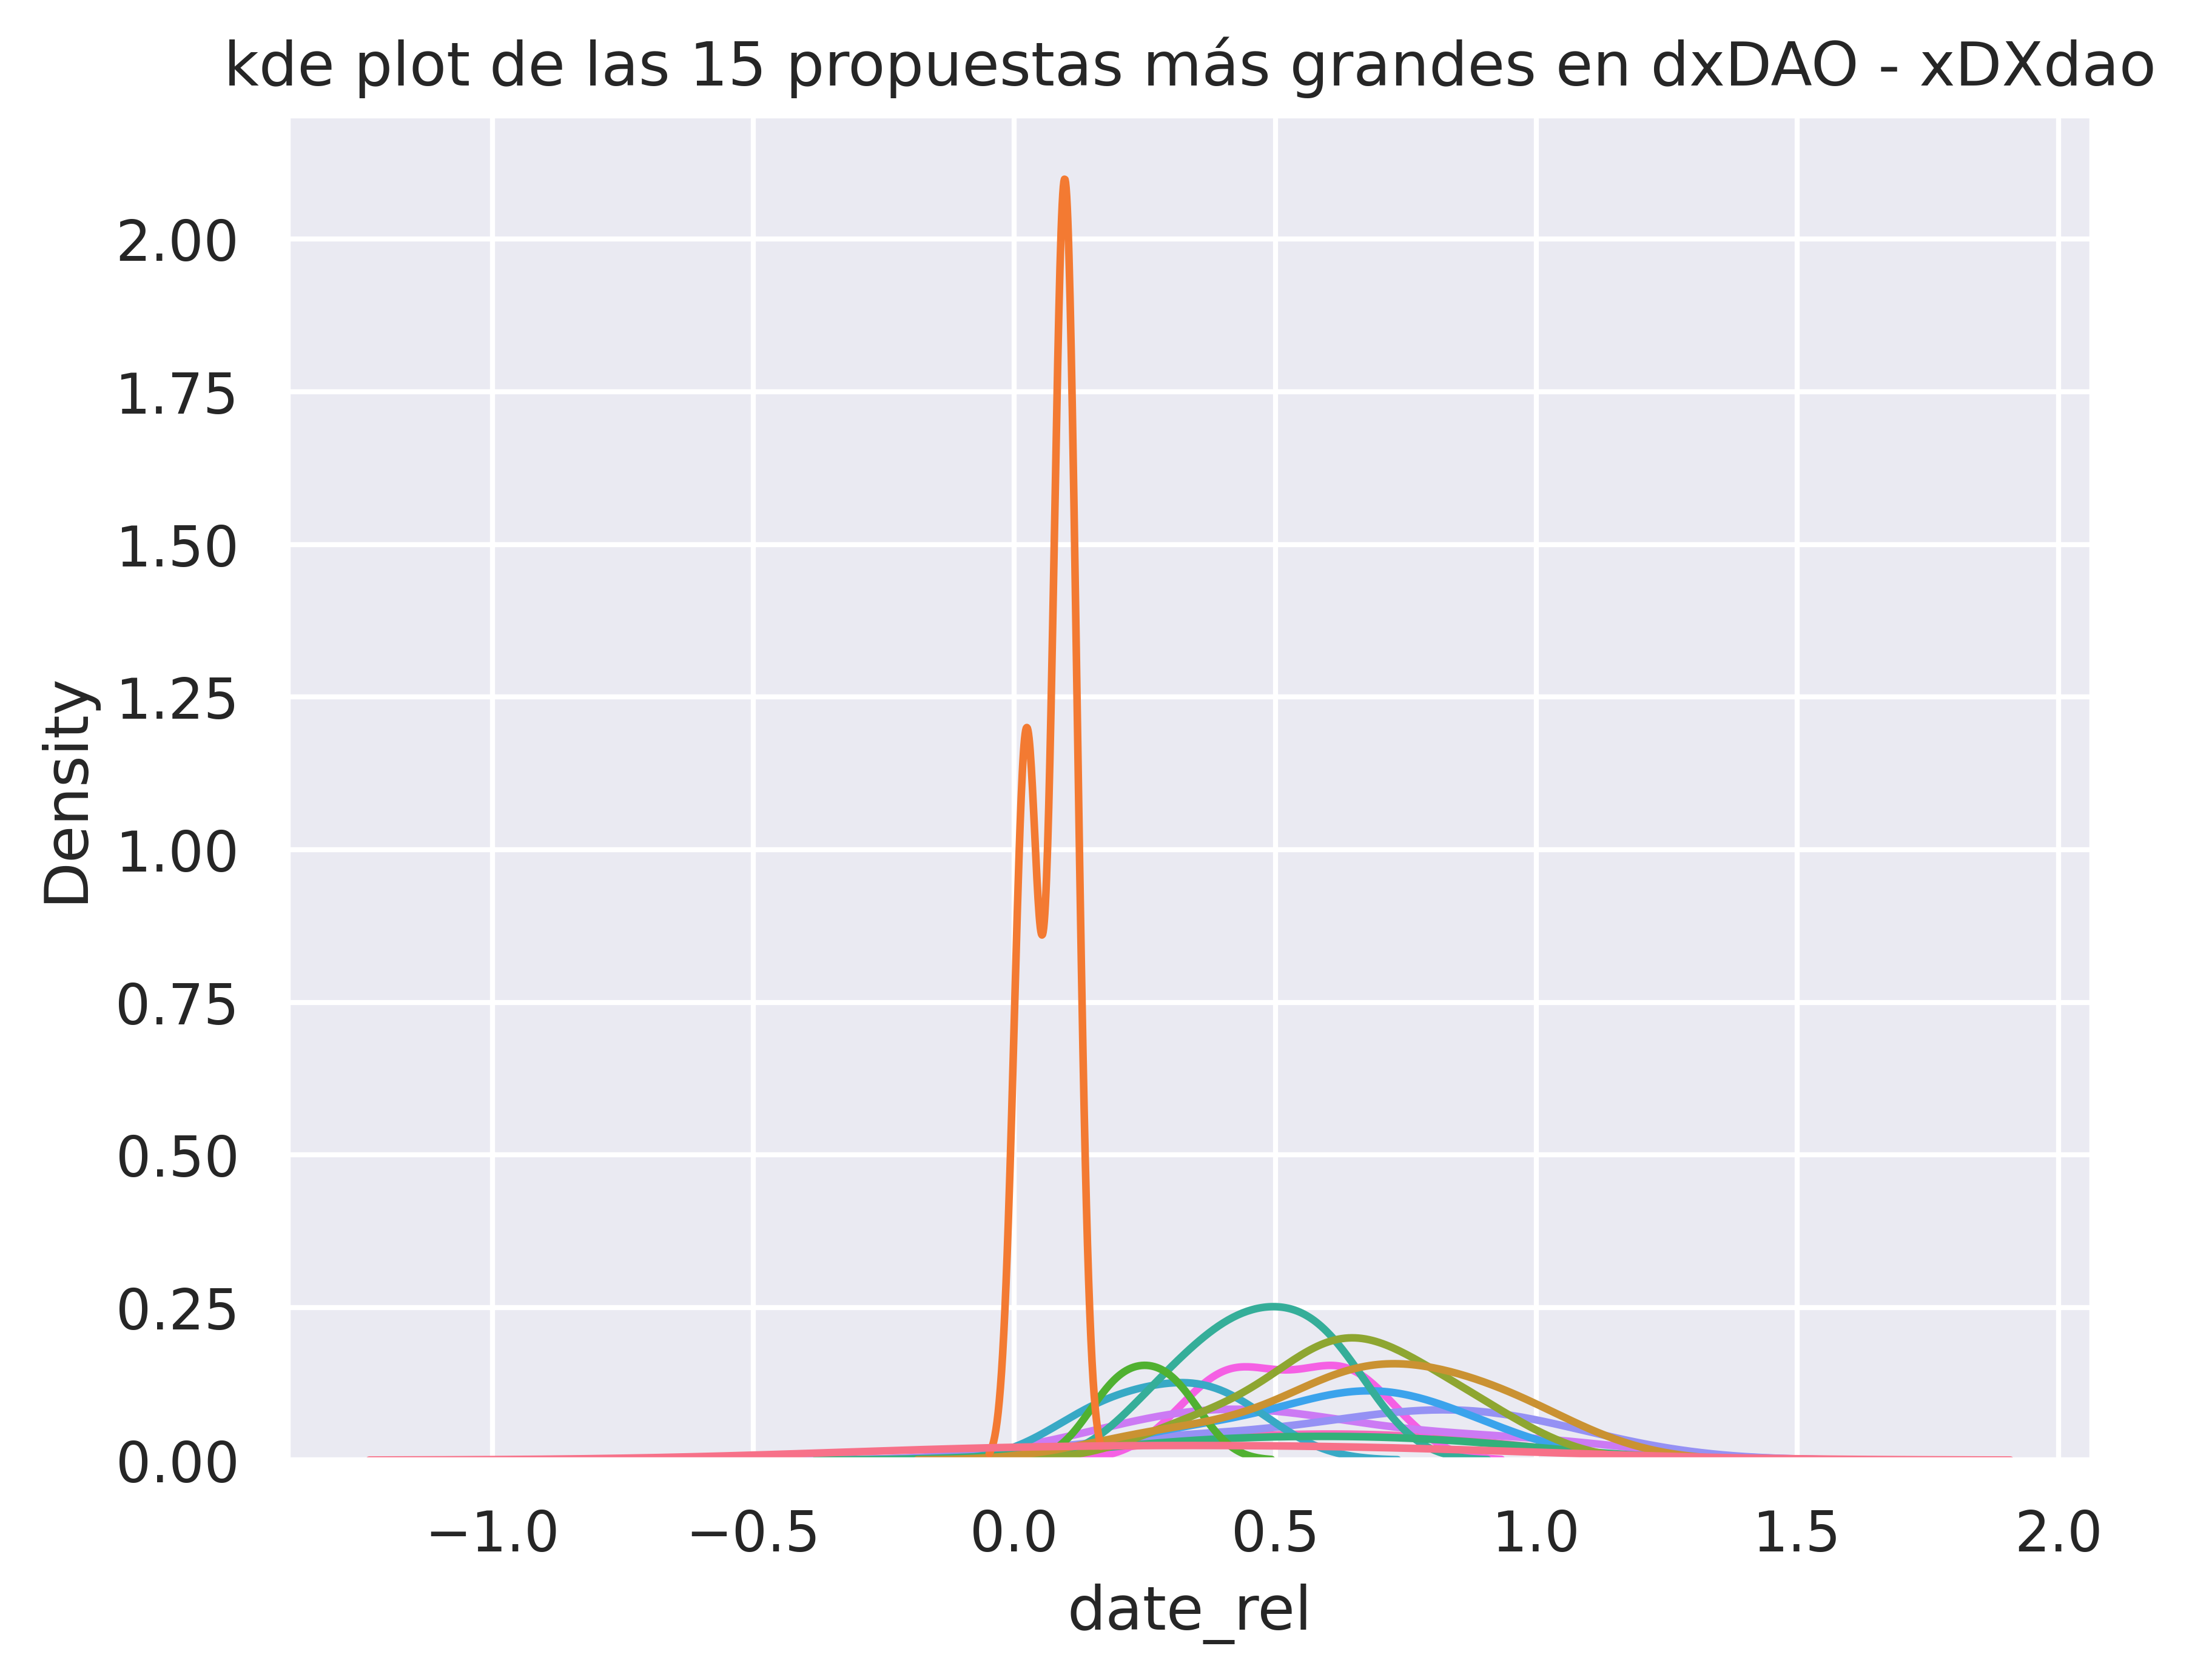

In [26]:
# Get N random proposals
# proposals = np.random.choice(_dfv2['proposal'].unique(), 15, replace=False, p=_dfv2.groupby('proposal').size() / _dfv2.groupby('proposal').size().sum())

# Get top N proposals
proposals = _dfv2.groupby('proposal').size().tail(15).index

_toplot = _dfv2[_dfv2['proposal'].isin(proposals)].copy()
_toplot['proposal'] = _toplot['proposal'].astype(str)
assert _toplot['proposal'].nunique() == len(proposals)
sns.kdeplot(_toplot, x='date_rel', hue='proposal', legend=False).set_title(f"kde plot de las 15 propuestas más grandes en {ORG_NAME}")

Efectivamente, los votos se realizan sobre todo nada más crearse la propuesta. El 25% de los votos ya han sido emitidos cuando aún queda un 95% del tiempo restante, y solo un 22% votan en la segunda mitad del tiempo disponible. Sin embargo, como podemos observar en la figura de `[kde plot de las 15 propuestas más grandes]`, hay propuestas en las que al final puede haber un pequeño repunte de actividad. Recordemos que en las DAOs el resultado de la votación es siempre visible, lo que puede sesgar la participación si los usuarios piensan que el resultado es estable y no va a cambiar.

Al partir el dataset en puntos aleatorios considerando una distribución uniforme, lo más seguro es que nos encontremos que las propuestas con las que entrenamos y testeamos (las _frontera_), tengan, en general más votos en el conjunto de entrenamiento que en el de test. Por esta razón también es necesario un sistema que sea muy resiliente al problema de cold start.